## **I. Perkenalan**

Nama    : Richie Devon Sumantri <br>

<div style='text-align: justify'><em>objective</em> dari dokumen ini adalah untuk menganalisis dan memprediksi potensi kemenangan suatu tim ketika menggunakan karakter tertentu menggunakan model yang telah dikembangkan berdasarkan dataset tier 1 tournament dota 2 dari tahun 2019 sampai 2022. 
</div><br>

---

Link Hugging Face : <a href='https://huggingface.co/spaces/53Devon/Dota_2_Machine_Learning'>Click Me!</a>

### **A. Latar Belakang**

Berlatar belakang sebagai seorang Data Analyst pada suatu tim eSports A yang akan masuk ke berbagai tournamen dalam skala internasional, pihak manajemen dan pelatih dari tim eSports A ingin memanfaatkan informasi data tournamen dari tahun 2019 sampai tahun 2022 untuk memprediksi karakter yang akan digunakan dan melihat strategi yang tepat dan efektif sepanjang tahun 2019 sampai tahun 2022. Dengan dapat memprediksi karakter yang optimal digunakan oleh tim lain maka dapat dimungkinkan tim eSports A untuk lebih siap dalam setiap pertandingan dan meningkatkan peluang menang terhadap tim lain. 

Dota 2 adalah permainan video multiplayer online battle arena (MOBA) yang dikembangkan oleh Valve Corporation. Diluncurkan pada Juli 2013, Dota 2 menampilkan dua tim beranggotakan lima pemain yang masing-masing mengendalikan karakter yang disebut "hero," dengan tujuan menghancurkan "Ancient" tim lawan di basis mereka. Permainan ini sangat populer secara global, dikenal karena kompleksitas strategi dan gameplay yang mendalam, serta memiliki ekosistem kompetitif dengan turnamen besar seperti The International, yang menawarkan hadiah uang yang sangat besar <a href='https://en.wikipedia.org/wiki/Dota_2'>[1]</a>.

> *Pada Tahun 2021 price pool Dota 2 The International adalah 40 Juta dolar AS atau setara 600 Miliar Rupiah* <a href='https://skor.id/post/prize-pool-dota-2-the-international-menurun-drastis-akan-bubar'>[2]</a>.

Di sini, sebagai pemain dan pemerhati skena profesional tentang permainan Dota 2, dengan lebih dari 4000 jam pengalaman bermain dan menikmati game ini, penulis begitu memahami permainan, dinamika tim, dan strategi kompetitif. Pengalaman ini tidak hanya mencakup keterlibatan langsung dalam _gameplay_, tetapi juga mencakup pengamatan terhadap perkembangan _meta_ dan analisis pertandingan profesional. Penulis menggabungkan kemampuan analisis data dan praktik lapangan untuk memberikan analisis yang komprehensif dan akurat, yang dapat digunakan untuk mendukung keputusan strategis dalam pertandingan kompetitif. Karena latar belakang yang kuat ini, penulis dapat memberikan sudut pandang yang berharga dan dapat dipercaya dalam eSports, terutama game Dota 2.

### **B. Deskripsi Dataset**

Dataset yang telah didapatkan terdiri dari informasi pertandingan professional dari tahun 2019 sampai 2022 yang mencakup informasi seperti tim yang bertanding, hasil pertandingan, karakter yang digunakan oleh masing-masing tim, lama pertandingan dan informasi tournament. Data ini mencakup ribuan informasi pertandingan yang dapat digunakan untuk membangun model prediksi yang dapat membantu pihak manajemen dan pelatih dari tim eSports A. 

### **C. Problem Statement**

1. Berapa skor yang umum terjadi pada seluruh pertandingan pada tahun 2019 sampai 2022?
2. Berapa durasi pertandingan yang umum terjadi pada seluruh pertandingan pada tahun 2019 sampai 2022?
3. Tim apa yang memiliki persentase kemenangan paling tinggi dan paling rendah dari tahun 2019 sampai 2022?
4. Karakter apa yang memiliki popularitas paling tinggi dan paling rendah dari tahun 2019 sampai 2022?
5. Model apa yang paling akurat dalam memprediksi hasil pertandingan?

## **II. Import Libraries**

Tahap memuat modul yang akan digunakan.

In [1]:
# Melakukan pengambilan library yang akan digunakan dalam dokumen ini

# Library untuk data manipulasi
import pandas as pd
import numpy as np

# Library export dan import model, scaling dan encoding
import pickle
import json

# Library pengolahan statistik
from scipy import stats
from scipy.stats import kruskal, gaussian_kde
from scipy.sparse import csr_matrix

# Library pengolahan menggunakan machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Library peghapusan warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Library Visualisasi
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, HTML

# Library fungsi personal
from function import *

## **III. Data Loading**

Tahap ini berupa tahap memuat data dari _dataset repository_ berupa <a href='https://www.kaggle.com/datasets/ridzdd/dota-2-tier-1-matches?resource=download'>Kaggle</a>.

In [2]:
# Membuka data dari dokumen csv dan diassign menuju variabel dataframe
df_org = pd.read_csv("Dataset.csv")

# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Pertandingan dari Tahun 2019 - 2022</h3></b></center>'))

# Menampilkan 10 data teratas 
display(df_org)


,MATCH_ID,MAP,TOURNAMENT,TEAM,SIDE,SCORE,RESULT,DURATION,HERO_1,HERO_2,HERO_3,HERO_4,HERO_5
0,1,1,ESL One Birmingham 2019,TNC Predator,dire,24.0,WIN,28:06,Wraith King,Sniper,Leshrac,Sand King,Chen
1,1,1,ESL One Birmingham 2019,Newbee,radiant,11.0,LOSE,28:06,Lifestealer,Oracle,Death Prophet,Lina,Mars
2,1,2,ESL One Birmingham 2019,TNC Predator,dire,11.0,LOSE,46:02,Templar Assassin,Terrorblade,Dark Seer,Tusk,Chen
3,1,2,ESL One Birmingham 2019,Newbee,radiant,35.0,WIN,46:02,Monkey King,Anti-Mage,Winter Wyvern,Jakiro,Sand King
4,2,1,ESL One Birmingham 2019,TNC Predator,radiant,33.0,WIN,22:07,Alchemist,Venomancer,Ember Spirit,Ancient Apparition,Earthshaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17715,803,4,DPC 2022 Winter Tour - Western Europe Finals,Gaimin Gladiators,dire,34,WIN,33:27,Lycan,Wraith King,Disruptor,Storm Spirit,Io
17716,804,1,ESL One Stockholm 2022,OG,radiant,7,LOSE,25:55,Treant Protector,Leshrac,Io,Viper,Dragon Knight
17717,804,1,ESL One Stockholm 2022,Tundra Esports,dire,24,WIN,25:55,Keeper of the Light,Juggernaut,Doom,Grimstroke,Visage
17718,804,2,ESL One Stockholm 2022,OG,dire,16,LOSE,31:01,Nature's Prophet,Underlord,Clockwerk,Grimstroke,Tiny


In [3]:
# Menampilkan judul display
display(HTML('<center><b><h3>Data Kolom Dataframe</h3></b></center>'))

# Menampilkan semua kolom pada dataframe
df_org.columns

Index(['MATCH_ID', 'MAP', 'TOURNAMENT', 'TEAM', 'SIDE', 'SCORE', 'RESULT',
       'DURATION', 'HERO_1', 'HERO_2', 'HERO_3', 'HERO_4', 'HERO_5'],
      dtype='object')

In [4]:
# Menampilkan informasi umum mengenai dataframe
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MATCH_ID    17720 non-null  int64 
 1   MAP         17720 non-null  int64 
 2   TOURNAMENT  17720 non-null  object
 3   TEAM        17720 non-null  object
 4   SIDE        17720 non-null  object
 5   SCORE       17705 non-null  object
 6   RESULT      17720 non-null  object
 7   DURATION    17720 non-null  object
 8   HERO_1      17720 non-null  object
 9   HERO_2      17720 non-null  object
 10  HERO_3      17720 non-null  object
 11  HERO_4      17720 non-null  object
 12  HERO_5      17720 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


**Informasi Kolom**:

| Kolom       | Deskripsi                                                                                                               |
|-------------|---------------------------------------------------------------------------------------------------------------------------|
| MATCH_ID    | Merupakan _unique identifier_ dari pertandingan yang dilakukan. Setiap pertandingan dapat memiliki lebih dari 1 MAP, dan satu MATCH_ID terdiri dari dua tim yang berada pada sisi yang berbeda. |
| MAP         | Merupakan informasi jumlah pertandingan antara dua tim yang telah berlangsung pada MATCH_ID tersebut.                     |
| TOURNAMENT  | Merupakan informasi nama Tournament yang sedang dijalankan oleh kedua belah tim, satu Tournament dapat memiliki berbagai MATCH_ID. |
| TEAM        | Merupakan informasi nama tim yang sedang bertanding pada MATCH_ID tersebut.                                               |
| SIDE        | Merupakan sisi yang dimiliki dari satu tim dalam MATCH_ID, sisi ini terdiri dari dua yakni, dire dan radiant.             |
| SCORE       | Merupakan angka skor yang dimiliki tim tersebut ketika pertandingan MAP tersebut telah selesai.                           |
| RESULT      | Merupakan hasil dari pertandingan yang melibatkan tim tersebut. RESULT terdiri dari dua yakni, WIN dan LOSE.              |
| DURATION    | Merupakan durasi dari pertandingan yang telah dilaksanakan pada MAP tersebut. Format dari kolom ini adalah menit:detik.   |
| HERO_1      | Merupakan nama karakter terakhir yang dipilih oleh tim tersebut.                                                           |
| HERO_2      | Merupakan nama karakter keempat yang dipilih oleh tim tersebut.                                                             |
| HERO_3      | Merupakan nama karakter ketiga yang dipilih oleh tim tersebut.                                                            |
| HERO_4      | Merupakan nama karakter kedua yang dipilih oleh tim tersebut.                                                           |
| HERO_5      | Merupakan nama karakter pertama yang dipilih oleh tim tersebut.                                                            |



**Insight:**

- Data Terdiri dari 17720 Baris dan 13 Kolom.
- Kolom pada _dataframe_ mayoritas terdiri dari data dengan tipe object
- Kolom SCORE dapat diubah menjadi integer atau float karena memiliki nilai mutlak maka dari itu bukan merupakan tipe object. 
- kolom DURATION merupakan kolom durasi pertandingan dengan format menit:detik, agar dapat diolah lebih universal maka dapat diubah menjadi satuan detik dengan tipe data integer.
- Terlihat adanya _missing value_ pada kolom score berdasarkan fungsi `.info`.

#### **Pengecekan Data & Perubahan Tipe Data**

Perubahan tipe data dilakukan agar dapat diolah pada EDA dan tahap selanjutnya.

In [5]:
df_org['SCORE'].unique()

array(['24.0', '11.0', '35.0', '33.0', '17.0', '27.0', '39.0', '19.0',
       '28.0', '12.0', '23.0', '34.0', '26.0', '20.0', '32.0', '15.0',
       '46.0', '4.0', '13.0', '21.0', '31.0', '18.0', '22.0', '37.0',
       '25.0', '14.0', '8.0', '7.0', '49.0', '54.0', '16.0', '43.0',
       '36.0', '10.0', '38.0', '40.0', '1.0', '5.0', '42.0', '48.0',
       '29.0', '41.0', '64.0', '45.0', '30.0', '2.0', '44.0', '47.0',
       '6.0', '55.0', '60.0', '9.0', '3.0', '52.0', '51.0', '50.0',
       '62.0', '53.0', '59.0', '58.0', nan, '57.0', '66.0', '63.0', '19',
       '15', '13', '33', '12', '22', '3', '21', '17', '30', '31', '37',
       '11', '27', '4', '39', '29', '18', '41', '24', '23', '9', '26',
       '35', '47', '36', '6', '20', '32', '34', '28', '16', '25', '52',
       '43', '38', '14', '1', '46', '42', '7', '2', '8', '49', '10', '40',
       '5', '50', '51', '48', '44', '45', '53', '63', '54', '65', '58',
       '57', 'W', 'FF', '56', '55', '59', '68.0', '71.0', '0.0', '70.0',
   

**Insight**:

Terlihat bahwa tidak semua isi kolom SCORE memiliki data numerikal namun memiliki isi berupa _object_ dengan isi berupa 'W' dan 'FF'. Dapat diasumsikan bahwa berdasarkan hal ini bahwa salah satu tim menyerah sebelum pertandingan dimulai, maka dari itu nilai dari baris ini dapat diganti dengan nilai 0 karena pertandingan telah selesai sebelum dimulai.

**Treatment**:

Pergantian nilai _value_ non-numerikal menjadi numerikal.

In [6]:
# Proses pergantian nilai kolom SCORE menjadi 0 
df_org.loc[(df_org['SCORE'] == 'W') | (df_org['SCORE'] == 'FF'), 'SCORE'] = 0

# Pergantian tipe data kolom
df_org['SCORE'] = df_org['SCORE'].astype(float)
df_org['DURATION'] = df_org['DURATION'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Pengecekan unique value dari kolom SCORE
df_org['SCORE'].unique()

array([24., 11., 35., 33., 17., 27., 39., 19., 28., 12., 23., 34., 26.,
       20., 32., 15., 46.,  4., 13., 21., 31., 18., 22., 37., 25., 14.,
        8.,  7., 49., 54., 16., 43., 36., 10., 38., 40.,  1.,  5., 42.,
       48., 29., 41., 64., 45., 30.,  2., 44., 47.,  6., 55., 60.,  9.,
        3., 52., 51., 50., 62., 53., 59., 58., nan, 57., 66., 63., 65.,
        0., 56., 68., 71., 70.])

## **IV. Exploratory Data Analysis (EDA)**

<div style='text-align: justify'>Tahap eksplorasi data menggunakan grouping, visualisasi sederhana dan lain-lain.
</div>

C:\Users\ricdv\AppData\Local\Temp\ipykernel_219896\2118835368.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax4.barh(y=df_bar_2[df_bar_2['RESULT'] == 'WIN'].head(10)['TEAM'], width=df_bar_2[df_bar_1['RESULT'] == 'WIN'].head(10)['proportion'], color='lightskyblue', edgecolor='black')


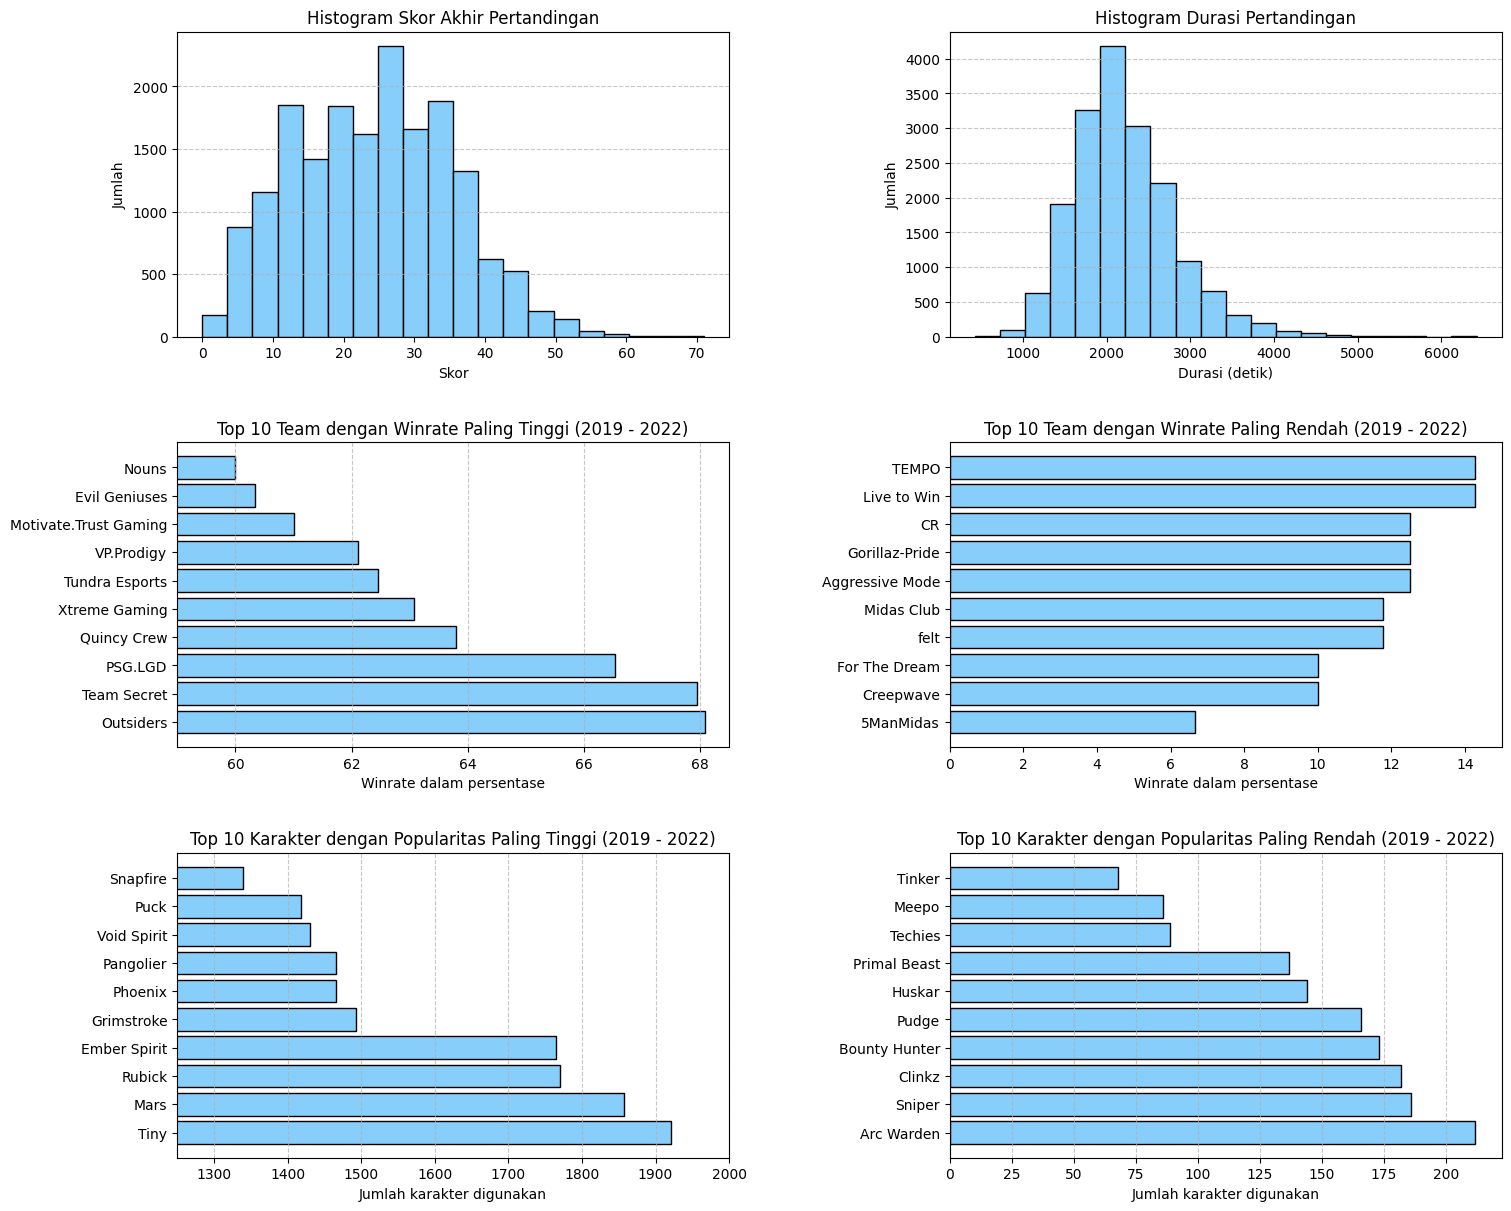

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))
gs = GridSpec(3, 2, figure=fig, hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

# Grafik kolom 0, 0
ax1.hist(df_org['SCORE'], bins=20, color='lightskyblue', edgecolor='black')
ax1.set_title('Histogram Skor Akhir Pertandingan')
ax1.set_ylabel('Jumlah')
ax1.set_xlabel('Skor')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik kolom 0, 1
ax2.hist(df_org['DURATION'], bins=20, color='lightskyblue', edgecolor='black')
ax2.set_title('Histogram Durasi Pertandingan')
ax2.set_ylabel('Jumlah')
ax2.set_xlabel('Durasi (detik)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik kolom 1, 0
df_bar_1 = (df_org.groupby('TEAM')['RESULT'].value_counts(normalize=True)*100).reset_index().sort_values(by='proportion', ascending=False)
ax3.barh(y=df_bar_1[df_bar_1['RESULT'] == 'WIN'].head(10)['TEAM'], width=df_bar_1[df_bar_1['RESULT'] == 'WIN'].head(10)['proportion'], color='lightskyblue', edgecolor='black')
ax3.set_title('Top 10 Team dengan Winrate Paling Tinggi (2019 - 2022)')
ax3.set_xlabel('Winrate dalam persentase')
ax3.grid(axis='x', linestyle='--', alpha=0.7)
ax3.set_xlim(59, 68.5)

# Grafik kolom 1, 1 
df_bar_2 = (df_org.groupby('TEAM')['RESULT'].value_counts(normalize=True)*100).reset_index().sort_values(by='proportion', ascending=True)
ax4.barh(y=df_bar_2[df_bar_2['RESULT'] == 'WIN'].head(10)['TEAM'], width=df_bar_2[df_bar_1['RESULT'] == 'WIN'].head(10)['proportion'], color='lightskyblue', edgecolor='black')
ax4.set_title('Top 10 Team dengan Winrate Paling Rendah (2019 - 2022)')
ax4.set_xlabel('Winrate dalam persentase')

# Grafik kolom 2, 0
df_bar_3 = df_org[['HERO_1', 'HERO_2','HERO_3','HERO_4','HERO_5']].stack().value_counts().reset_index()
ax5.barh(y = df_bar_3['index'].head(10), width=df_bar_3['count'].head(10),color='lightskyblue', edgecolor='black')
ax5.set_title('Top 10 Karakter dengan Popularitas Paling Tinggi (2019 - 2022)')
ax5.grid(axis='x', linestyle='--', alpha=0.7)
ax5.set_xlabel('Jumlah karakter digunakan')
ax5.set_xlim(1250, 2000)

# Grafik kolom 2, 1
df_bar_4 = df_org[['HERO_1', 'HERO_2','HERO_3','HERO_4','HERO_5']].stack().value_counts().reset_index()
ax6.barh(y = df_bar_3['index'].tail(10), width=df_bar_3['count'].tail(10),color='lightskyblue', edgecolor='black')
ax6.set_title('Top 10 Karakter dengan Popularitas Paling Rendah (2019 - 2022)')
ax6.grid(axis='x', linestyle='--', alpha=0.7)
ax6.set_xlabel('Jumlah karakter digunakan')

# Menampilkan grafik
plt.show()	

**Insight**:

- Mayoritas skor dalam pertandingan selama 2019 - 2022 berakhir diantara skor 10 sampai 40 sementara cukup sedikit data skor di atas 50 dan di bawah 5.
- Mayoritas pertandingan berlangsung diantara 1500 sampai 2500 detik atau setara dengan 25 sampai 41 menit sementara cukup sedikit data pertandingan selesai di bawah 1000 detik dan di atas 4000 detik. 
- Tiga tim dengan persentase kemenangan paling tinggi adalah tim Outsiders, Team Secret dan PSG.LGD. Maka dari itu dalam melihat strategi dan pemilihan karakter dapat berdasar pada tim dengan persentase kemenangan tinggi sehingga dapat menjadi referensi dalam pembuatan strategi. Sementara tiga tim dengan persentase kemenangan paling rendah adalah 5ManMidas, For The Dream, dan Creepwave. Memahami kelemahan dan kesalahan strategi dari tim-tim ini dapat memberikan wawasan tentang apa yang harus dihindari atau diperbaiki dalam strategi tim.
- Tiga karakter dengan popularitas paling tinggi adalah Tiny, Mars dan Rubick. Maka dari itu dalam penentuan pemilihan karakter dapat mengikuti karakter dengan popularitas yang tinggi karena berhubungan dengan meta (strategi atau gaya bermain yang dianggap paling efektif <a href='https://duniagames.co.id/discover/article/penjelasan-meta-dalam-game'>[3]</a>). Diharapkan dengan penggunaan karakter-karakter dengan popularitas yang tinggi dapat memberikan peluang kemenangan yang lebih tinggi dibandingkan dengan karakter lain. Sementara tiga karakter dengan popularitas paling rendah adalah Tinker, Meepo dan Techies. Diasumsikan bahwa ketiga karakter ini memiliki popularitas yang rendah dikarenakan kompleksitas dari karater tersebut yang cukup tinggi serta karakteristik karakter yang tidak cocok dan tidak memungkinkan untuk meta sepanjang tahun 2019 - 2022. Pemilihan karakter ini diperlukan pemahaman yang tinggi agar dapat memberikan peluang kemenangan yang sama dengan karakter lain, namun secara umum pemilihan karakter-karakter dengan popularitas yang rendah cukup cenderung beresiko tinggi ketika digunakan dalam pertandingan.
 

## **V. Feature Engineering**

<div style='text-align: justify'>Tahap pengolahan data sebelum melakukan proses permodelan.
</div>

In [8]:
# Proses persalinan dataframe dari dataframe original
df_feat = df_org.copy()

### **1. Handling Data Duplikasi**

Pada tahap ini dilakukan pengecekan duplikasi data pada _dataframe_.

In [9]:
# Pengecekan data duplikasi
print(f'Jumlah data duplikat: {df_feat.duplicated().sum()}')

Jumlah data duplikat: 0


**Insight**:

- Berdasarkan informasi pengecekan data duplikasi, tidak terdapat data yang memiliki status duplikat. Sehingga tidak akan dilakukan _treatment_ apapun terkait dengan data duplikasi.

### **2. Split Data**

Pada tahap ini dilakukan pemisahan data antara data _feature_ dan data target.

In [10]:
# Pembuatan dataframe fitur
X = df_feat.drop(['MATCH_ID', 'RESULT'], axis=1)

# Pembuatan dataframe target
y = df_feat['RESULT']

**Penjelasan**:

- `X`: Merupakan variabel _dataframe_ yang menampung data _feature_ dalam permodelan. Proses penghapusan kolom MATCH ID dikarenakan merupakan _unique indentifier_ dari _dataframe_ sementara kolom RESULT merupakan data target sehingga harus dipisahkan.
- `y`: Merupakan variabel _dataframe_ yang menampung data target dalam permodelan.


**Konversi Data Target menjadi format Boolean**

In [11]:
# Melakukan proses pergantian data menjadi boolean
y = y.map({'WIN': 1, 'LOSE': 0})

**Penjelasan**:

Konfersi data target dilakuakan menjadi bentuk boolean yang mudah diproses dan dipahami berupa nilai target WIN menjadi nilai 1 sementara nilai target LOSE menjadi nilai 0.

**Pemisahan Data Train dan Test**

In [12]:
# Pemisahakan data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14)

**Penjelasan**:

Pemisahakan data dilakukan dengan mengambil _test_ sebesar 15% dari keseluruhan data dengan posisi keacakan dengan _state_ senilai 14.

### **3. Handling Outlier**

Pada tahap ini dilakukan penanganan terhadap data yang memiliki _outlier_. Tahap ini dimulai dengan memisahkan tipe kolom numerikal dan kategorikal dari kolom _dataframe_.

In [13]:
# Proses Pemisahan kolom berdasarkan tipe numerikal dan kategorikal
kolom_numerikal = ['SCORE','DURATION']
X_train_num = X_train[kolom_numerikal]

kolom_kategorikal = ['MAP', 'TOURNAMENT','TEAM', 'SIDE', 'HERO_1', 'HERO_2', 'HERO_3', 'HERO_4', 'HERO_5']
X_train_cat = X_train[kolom_kategorikal] 

**Penjelasan**:

- **kolom_numerikal**: Merupakan variabel list yang berisi nama-nama kolom yang bertipe numerikal.
- **kolom_kategorikal**: Merupakan variabel list yang berisi nama-nama kolom yang bertipe kategorikal.
- **X_train_num**: Merupakan variabel _dataframe_ X_train yang berisi kolom bertipe numerikal.
- **X_train_cat**: Merupakan variabel _dataframe_ X_train yang berisi kolom bertipe kategorikal.

#### **Preview Data Outlier pada Kolom Numerikal**

In [14]:
# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Persentase Outlier Sebelum Outlier Handling</h3></b></center>'))

# Pengecekan persentase outlier
X_train_num_data = analisis_outlier(X_train_num)

# Menampilkan hasil dataframe
X_train_num_data

,Nama_kolom,Persentase_outlier,Jumlah_outlier,Jenis_distribusi,Skew
0,DURATION,2.449874,369,Skew,0.91621
1,SCORE,0.165981,25,Normal,0.212534


**Insight**:

- Terlihat dari informasi ini bahwa keseluruhan data memiliki _outlier_ dan kurang dari 5% dari keseluruhan data.
- Informasi dari _dataframe outlier_ terlihat bahwa 1 kolom memiliki distribusi _skew_ dan 1 kolom memilki distribusi normal.

**Treatment**:

Bentuk _treatment_ yang akan dilakukan adalah melakukan proses penghapusan pada data-data kolom di atas sehingga dapat meminimalisir _outlier_. Keputusan ini diambil dikarenakan jumlah data yang _outlier_ yang kecil dari keseluruhan jumlah data.


#### **Proses Drop Data Outlier**

In [15]:
# Treatment Handling menggunakan capping
X_train, X_test = auto_outlier_handling('Drop', X_train, X_test, X_train_num_data)

# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Persentase Outlier Setelah Outlier Handling</h3></b></center>'))

# Menampilkan dataframe analisis persentase outlier
X_train_num_data = analisis_outlier(X_train[kolom_numerikal])
X_train_num_data

,Nama_kolom,Persentase_outlier,Jumlah_outlier,Jenis_distribusi,Skew
0,SCORE,0.040925,6,Normal,0.179049
1,DURATION,0.0,0,Normal,0.316934


**Penjelasan**:

Terlihat bahwa kolom DURATION telah mengalami pembersihan data _outlier_, hal ini terlihat dari jumlah persentase outlier yang mencapai 0%. Sementara _outlier_ pada kolom SCORE masih terdapat 0.04% dari keseluruhan data, hal ini dianggap sebagai data _outlier_ yang _genuine_. Selain dari jumlah yang termasuk kecil dari keseluruhan data, hasil penghapusan kolom dapat mengakibatkan pergeseran standar deviasi sehingga menghasilkan data _outlier_ baru di luar _lower boundaries_ dan _upper boundaries_. 

#### **Penyesuaian Data Target**

In [16]:
# Penyesuaian jumlah kolom data target train setelah dilakukan pengahapusan data
y_train = y_train.loc[X_train.index]

Penyesuaian data target dibutuhkan agar jumlah dan bentuk data _target_ sesuai dengan data _train_.

### **4. Handling Missing Value**

Pada tahap ini dilakukan penanganan terhadap adanya nilai yang kosong pada _dataframe_.

In [17]:
# Pengecekan missing value
print('Jumlah missing value pada X_train :' ,int(X_train.isna().sum().sum()))
print('Jumlah missing value pada X_test :' ,int(X_test.isna().sum().sum()))
print('Jumlah missing value pada y_train :' ,int(y_train.isna().sum().sum()))
print('Jumlah missing value pada y_test :' ,int(y_test.isna().sum().sum()))

Jumlah missing value pada X_train : 0
Jumlah missing value pada X_test : 4
Jumlah missing value pada y_train : 0
Jumlah missing value pada y_test : 0


**Penjelasan**:

- Terlihat bahwa ada _missing value_ pada data _test_. Namun dikarenakan data _missing value_ ini berada pada data _test_ maka tidak dapat dilakukan _treatment_ apapun, hal ini dikarenakan dianggap dapat mempengaruhi hasil prediksi dari data _test_. Penyesuaian data _test_ akan dilakukan _treatment_ apabila model tidak dapat mengelola data dengan _missing value_.

### **5. Checking Cardinality**

Pada tahap ini dilakukan pengecekan kardinalitas dari masing-masing kolom  pada _dataframe_ train. Tujuan dari tahap ini adalah penentuan kebutuhan _feature extraction_ atau _feature creation_ untuk mengurangi kardinalitas dan variasi sehingga diharapkan bahwa model dapat lebih mudah mengerti informasi pada _dataframe_ dengan melihat garis besar dari informasi pada suatu kolom. 

In [18]:
analisis_cardinality(X_train)

,Nama_kolom,Num_Unique_Value,Unique_Value : Count,Unique_Value_list
0,DURATION,2218,"[{'2044': 9}, {'2324': 7}, {'1965': 14}, {'216...",[2044 2324 1965 ... 3015 1359 3327]
1,TEAM,180,"[{'PSG.LGD': 650}, {'Tundra Esports': 208}, {'...",['PSG.LGD' 'Tundra Esports' 'Team Liquid' 'mud...
2,HERO_1,123,"[{'Pugna': 134}, {'Tusk': 59}, {'Visage': 63},...",['Pugna' 'Tusk' 'Visage' 'Batrider' 'Lina' 'Br...
3,HERO_2,123,"[{'Tidehunter': 205}, {'Dark Seer': 138}, {'Sa...",['Tidehunter' 'Dark Seer' 'Sand King' 'Invoker...
4,HERO_3,123,"[{'Terrorblade': 60}, {'Troll Warlord': 72}, {...",['Terrorblade' 'Troll Warlord' 'Dark Willow' '...
5,HERO_4,122,"[{'Grimstroke': 309}, {'Bristleback': 84}, {'T...",['Grimstroke' 'Bristleback' 'Terrorblade' 'Nag...
6,TOURNAMENT,120,"[{'The Chongqing Major': 147}, {'DPC 2021 Seas...",['The Chongqing Major' 'DPC 2021 Season 1 - Eu...
7,HERO_5,120,"[{'Tusk': 218}, {'Earth Spirit': 230}, {'Keepe...",['Tusk' 'Earth Spirit' 'Keeper of the Light' '...
8,SCORE,58,"[{'31.0': 428}, {'41.0': 157}, {'32.0': 421}, ...",[31. 41. 32. 19. 37. 6. 7. 24. 13. 21. 34. 3...
9,MAP,5,"[{'1': 6434}, {'3': 1958}, {'2': 6133}, {'4': ...",[1 3 2 4 5]


**Insight**:

Terlihat bahwa berdasarkan variasi dari kolom kategorikal pada _dataframe_ ini bahwa pada mayoritas kolom memiliki itngkat kardinalitas yang tinggi. sehingga dibutuhkan proses kategori untuk membuat model lebih mudah mengenali informasi data, namun hal ini cukup dilakukan ketika model memiliki performa yang buruk. Maka dari itu, tidak dilakukan _feature creation_ atau _feature extraction_ sebelum melihat performa dari model yang akan digunakan. 

### **6. Checking Data Balance**

Proses dilakukan untuk melihat penyebaran dari data _target_.

In [19]:
# Melihat jumlah value dari data target
df_org['RESULT'].value_counts()

RESULT
WIN     8860
LOSE    8860
Name: count, dtype: int64

**Insight**:

- Terlihat bahwa data masing-masing _unique value_ dari data target tersebar dengan merata. Maka dari itu tidak dibutuhkan _data balancing_ pada tahap berikutnya. 

### **7. Feature Selection**

Pada tahap ini dilakukan pemilihan _feature_ yang memiliki hubungan dengan nilai target.

#### **Pengolahan Data Train Numerikal**

In [20]:
# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Korelasi Data Train Numerikal</h3></b></center>'))

# Proses pengolahan dataframe train dengan tipe nominal dengan dataframe target
correlation_df_num = correlation_df('Anova/Kruskal', X_train, y_train, kolom_numerikal)

# Menampilkan hasil correlation
display(correlation_df_num)

# Pembuatan list kolom selection
kolom_numerikal_selection = list(correlation_df_num[correlation_df_num['Correlation Status'] == 'Correlated']['Nama Kolom'])


,Nama Kolom,Corr value,P-Value,Correlation Status
0,SCORE,6952.383185,0.0,Correlated
1,DURATION,0.004652,0.945625,Not Correlated


**Insight**:

- Pada informasi di atas terlihat bahwa SCORE memiliki korelasi dengan data _target_. Hal ini terlihat dari  nilai p-value di bawah 0.05.
- Kolom SCORE yang memiliki hubungan atau korelasi dengan penentuan target berupa hasil pertandingan dianggap sangat logis memberikan pengaruh yang sangat kuat. Hal ini didasarkan dengan mayoritas tim yang menang memiliki skor yang lebih tinggi dari pada tim yang kalah. 
- Pemilihan Metode Anova dikarenakan data input perbandingan dari X_train memiliki tipe numerikal sementara data output berupa kategorikal nominal sehingga pemilihan metode yang tepat adalah ANOVA / Kruskal. Sehingga perbandingan dari data _unique value_ kategorikal pada data target dapat dilakukan perbandingan pada masing-masing data kolom numerikal, dengan melakukan perbandingan ini dapat ditentukan apakah ada korelasi berdasarkan perbandingan tertentu. Penentuan menggunakan fungsi `correlation_df` akan melakukan perhitungan otomatis untuk nilai _skewness_ dari setiap kolom sehingga dapat menentukan metode ANOVA atau Kruskal secara otomatis. 

#### **Pengolahan Data Train Kategorikal**

In [21]:
# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Korelasi Data Train Kategorikal</h3></b></center>'))

# Proses pengolahan dataframe train dengan tipe ordinal dengan dataframe target
correlation_df_cat = correlation_df('Chisquare', X_train, y_train, kolom_kategorikal)

# Menampilkan hasil pengolahan korelasi 
display(correlation_df_cat)

# Pembuatan list kolom selection
kolom_kategorikal_selection = list(correlation_df_cat[correlation_df_cat['Correlation Status'] == 'Correlated']['Nama Kolom'])

,Nama Kolom,Corr value,P-Value,Correlation Status
0,TEAM,823.020719,0.0,Correlated
1,HERO_5,159.985493,0.007274,Correlated
2,HERO_1,157.403929,0.017004,Correlated
3,HERO_2,143.869779,0.085924,Not Correlated
4,HERO_3,138.443404,0.146624,Not Correlated
5,SIDE,2.091318,0.148138,Not Correlated
6,HERO_4,133.64757,0.203606,Not Correlated
7,MAP,0.224908,0.994132,Not Correlated
8,TOURNAMENT,17.250477,1.0,Not Correlated


**Insight**:

- Terlihat dari informasi di atas bahwa keseluruhan informasi TEAM, HERO_5 dan HERO_1 memiliki hubungan dengan penentuan data _target_. Hal ini terlihat dari nilai p-value yang memiliki nilai di bawah 0.05.
- Berdasarkan informasi dari _data frame_ analisis korelasi terlihat bahwa TEAM memiliki korelasi akan penentuan kemenangan terbesar dibandingkan dengan kolom HERO_1 dan HERO_5. Maka dari itu selain dari pemilihan karakter permainan, faktor pemain dari tim tersebut lebih mempengaruhi penentuan kemenangan dari pada pemilihan karakter yang tepat. 
- Terlihat nilai korelasi value dari HERO_1 dan HERO_5 hampir mendekati satu sama lain namun kolom lain seperti HERO_2, HERO_3 dan HERO_4 tidak memiliki cukup data untuk bisa menarik kesimpulan bahwa kolom tersebut mempengaruhi penentuan kemenangan suatu pertandingan. Yang membedakan kolom HERO_1 dan HERO_5 dengan kolom HERO lain adalah kolom HERO_1 adalah karakter terakhir yang dipilih oleh tim tersebut sementara kolom HERO_5 merupakan karakter pertama yang dipilih oleh tim tersebut, hal ini sering disebut sebagai _first pick_ dan _last pick_. Strategi pemilihan karakter yang paling optimal ketika memilih karakter pertama dan terakhir terbukti secara statistik dapat mempengaruhi kemenangan suatu tim, hal ini dapat dikarenakan pemilihan karakter pertama dapat memberikan fleksibilitas dalam penyusunan strategi serta pemilihan karakter terakhir dapat mengisi kekurangan dari _lineup_ tersebut dan menjadi jawaban dari _lineup_ musuh.
- Pemilihan metode `Chisquare` dikarenakan bentuk tipe data X_train dan data target adalah kategorikal, sehingga proses berbandingan korelasi menggunakan _contigency table_ pada masing-masing _unique value_ pada kolom _feature kategorikal_ dengan data _target_. 

**Feature Selection**:

Pemilihan _feature_ yang akan digunakan dalam permodelan adalah sebagai berikut:
- SCORE
- TEAM 
- HERO_1
- HERO_5

In [22]:
# Menampilkan hasil feature selection kategorikal
print(f'Kategorikal feature selection: {kolom_kategorikal_selection}')

# Menampilkan hasil feature selection numerikal
print(f'Numerikal feature selection: {kolom_numerikal_selection}')

Kategorikal feature selection: ['TEAM', 'HERO_5', 'HERO_1']
Numerikal feature selection: ['SCORE']


### **8. Scaling dan Encoding**

_Scaling_ dapat dilakukan menggunakan _Robust scaler_ dan _Standard scaler_, pemilihan _scaler_ ini bergantung pada tipe data terdistribusi normal atau tidak. Dengan menggunakan _Robust scaler_ yang mempertimbangkan median dan iqr sehingga cocok dengan data bertipe _skew_, sementara penggunaan _standard scaler_ mempertimbangkan rata-rata dan standard deviasi dari data tersebut sehingga cocok untuk distribusi normal. 

Proses _encoding_ dilakukan pada kolom kategorikal nominal dan ordinal. Proses _encoding_ pada data kolom nominal akan menggunakan _treatment_ **One-Hot Encoding**, sementara kolom ordinal akan menggunakan _treatment_ **Ordinal Encoding**.

In [23]:
# Pembuatan list kolom normal dan skew
kolom_normal = []
kolom_skew = []

# Pengulangan pada setiap kolom di kolom numerikal feature selection
for col in kolom_numerikal_selection:
	
	# Pembuatan fileeter data di mana hanya ada data nama kolom pada dataframe informasi outlier
	filtered_df = X_train_num_data[X_train_num_data['Nama_kolom'] == col]

	# Filtering ketika distribusi adalah normal
	if filtered_df['Jenis_distribusi'].values[0] == 'Normal' :
		
		# Input ke dalam list kolom normal
		kolom_normal.append(col)
	
	# Filtering ketika distribusi tidak normal
	else:
	
		# Input ke dalam list kolom skew
		kolom_skew.append(col)

# Pembuatan scaler ketika mayoritas data terdiri dari data normal
if len(kolom_normal) > len(kolom_skew):
		
		 # Pembuatan scaler
		scaler = StandardScaler()
	 
# Pembuatan scaler ketika mayoritas data terdiri dari data skew
if len(kolom_skew) >= len(kolom_normal):
	
		# Pembuatan scaler
		scaler = RobustScaler()

# Pembuatan pipeline scaler
num_transformer = make_pipeline(scaler)

# Pembuatan pipeline encoding
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# Pembuatan pipeline preprocessing berupa scaling dan encoding
preprocessor = ColumnTransformer(transformers=[
    ('pipe_num', num_transformer, kolom_numerikal_selection),
    ('pipe_cat', cat_transformer, kolom_kategorikal_selection)
])

# Proses pembelajaran model dan transformasi data train menggunakan pipeline preprocessing
X_train_final = preprocessor.fit_transform(X_train)

# Proses transformasi data test menggunakan pipeline preprocessing
X_test_final = preprocessor.transform(X_test)

## **VI. Model Definition**

Model yang akan digunakan dalam dokumen ini adalah sebagai berikut.

1. **Super Vector Machine**, merupakan klasifikasi kategorikal yang ditentukan dengan membuat garis _decision boundaries_ dengan melihat jarak akan data pada masing-masing kelas. SVM dapat membentuk _decision boundries_ berupa garis lurus dan garis melengkung, ketika data yang ditemukan tidak bisa dipisahkan menggunakan kedua cara tersebut maka SVM dapat menggunakan dimensi yang lebih tinggi untuk dapat memisahkan data antar kelas. Hal ini dapat ditemukan dalam penggunaan RBF Kernel. Kelebihan dari model ini adalah dapat membentuk _decision boundaries_ dengan memanfaatkan peningkatan dimensi sehingga dapat selalu melakukan klarifikasi kelas yang tidak bisa dilakukan dengan garis _linear_ atau _curve_, sementara kekurangan dari model ini adalah memakan _resource komputasi_ tinggi. Hyperparameter yang dapat digunakan dalam SVM adalah sebagai berikut.
	- C, merupakan tingkat toleransi akan data kelas yang berada pada sekitar _decision boundaries_.
	- Gamma, merupakan kontrol pengaruh jarak data akan penentuan _decision boundaries_, ketika nilai gamma semakin besar maka posisi data yang jauh dari _decision boundaries_ akan tetap menjadi bagian perhitungan.

2. **K-Nearest Neighbors**, merupakan metode prediksi dengan melihat data _test_ yang dibandingkan dengan data historis data _train_ menggunakan jumlah kelas data pada sekitar data tersebut. Penentuan jumlah data kelas sekitar data tersebut (K) adalah nilai ganjil akar dari jumlah data. Kelebihan dari model ini adalah tidak membutuhkan pelatihan model dan cukup melakukan pencocokan data _test_ dan _train_, sementara kekurangan dari model ini adalah tidak bisa memprediksi data yang tidak memiliki riwayat historis pada data _train_. Hyperparameter yang dapat digunakan dalam KNN adalah sebagai berikut.
	- n_neighbors, merupakan penentuan jumlah data terdekat ketika melakukan perbandingan data historis.

3. **Decision Tree**, merupakan metode prediksi dengan membagi data _train_ menjadi beberapa cabang berdasarkan fitur yang paling signifikan dalam mempengaruhi variabel target. Setiap cabang pada _decision tree_ mewakili keputusan berdasarkan fitur tertentu, dan setiap daun mewakili hasil prediksi. Proses ini berulang hingga semua data telah dipecah menjadi cabang kecil yang representatif atau hingga mencapai kedalaman maksimum yang ditentukan. Kelebihan dari model ini adalah mudah untuk interpretasikan dan divisualisasikan, sementara kekurangan dari model ini adalah sangat mudah untuk terjadi _overfitting_ dikarenakan cabang dan kedalaman dari pohon yang terlalu spesifik sehingga membuat model terlalu kompleks. Hyperparamter yang dapat digunakan dalam Decision Tree adalah sebagai berikut. 
	- max_depth, merupakan tingkat kedalaman dari _decision tree_ sehingga dapat mementukan tingkat kompleksitas dari model.
	- min_sample_leaf, merupakan jumlah minimum dari daun model _decision tree_.
	- min_sample_split, merupakan jumlah minimum dari node untuk dapat berhenti dilakukan split menjadi daun pohon _decision tree_. Memperbesar min_sample_split dapat mencegah model menjadi kompleks.

4. **Random Forest**, merupakan metode _Bagging ensemble learning_ yang menggabungkan banyak model _decision tree_ untuk meningkatkan akurasi dan mengurangi overfitting. Setiap _decision tree_ dalam model _random forest_ dilakukan pembelajaran pada sebagian data _train_. Prediksi akhir dihasilkan dengan mengambil rata-rata (untuk regresi) atau modus (untuk klasifikasi) dari prediksi semua _decision tree_. Kelebihan model ini adalah dapat memberikan hasil prediksi yang lebih akurat dan dapat mengurangi resiko _overfitting_ dibandingkan dengan model _decision tree_ secara tunggal. Namun, kekurangannya adalah model ini memerlukan lebih banyak waktu komputasi yang tinggi karena melibatkan banyak pohon keputusan. Hyperparameter yang dapat digunakan dalam Random Forest adalah sebagai berikut:
	- n_estimator, merupakan jumlah model _decision tree_ yang akan digunakan dalam model ini.
	- max_depth, merupakan tingkat kedalaman dari _decision tree_ sehingga dapat mementukan tingkat kompleksitas dari model.
	- min_sample_leaf, merupakan jumlah minimum dari daun model _decision tree_.
	- min_sample_split, merupakan jumlah minimum dari node untuk dapat berhenti dilakukan split menjadi daun pohon _decision tree_. Memperbesar min_sample_split dapat mencegah model menjadi kompleks.

Latar belakang _begging_ adalah untuk membuat model yang akurat dengan melakukan pengolahan sebagian data _train_ dengan suatu model dalam beberapa kali, penentuan prediksi akan dilakukan dengan melihat perbandingan nilai rata-rata atau modus dari berbagai prediksi model tersebut. Dengan melakukan beberapa kali proses _modelling_ diasumsikan bahwa hasil prediksi yang dihasilkan dapat lebih akurat karena dilakukan dengan berbagai bagian data secara berkali-kali. 

5. **AdaBoosting**, merupakan metode _Boosting ensemble learning_ yang menggabungkan banyak model untuk meningkatkan akurasi dan mengurangi kesalahan prediksi. Setiap model lemah dilatih secara berurutan, di mana model berikutnya fokus pada data yang diprediksi salah oleh model sebelumnya. Prediksi akhir dihasilkan dengan menggabungkan semua model, memberikan bobot lebih besar pada model yang memiliki kinerja lebih baik. Kelebihan model ini adalah dapat meningkatkan akurasi prediksi dengan memberikan perhatian lebih pada data yang sulit diprediksi, serta mampu menangani berbagai jenis data. Namun, kekurangannya adalah model ini dapat rentan terhadap _outlier_, serta memerlukan lebih banyak komputasi untuk pelatihan. Hyperparameter yang dapat digunakan dalam AdaBoosting adalah sebagai berikut:
	- n_estimator, merupakan jumlah model yang akan digunakan dalam model ini.
	- base_estimator, merupakan nama model yang akan digunakan dalam pelatihan berkali-kali pada model ini.

Cross validation adalah proses pengujian model menggunakan sebagian dari data _train_ berdasarkan jumlah _fold_ untuk menghasilkan nilai _cross validation_ berupa rata-rata dan standar deviasi ketika melakukan proses pembelajaran model pada setiap jumlah _fold_ menggunakan data _train_. _Cross validation_ berguna untuk memberikan gambaran yang lebih umum dan akurat terkait dengan kinerja model. 

Metrics yang dapat digunakan dalam penentuan klarifikasi kelas adalah sebagai berikut. 

- **Akurasi**, merupakan nilai keakuratan dari keseluruhan prediksi. Akurasi dipilih dikarenakan penting untuk selalu mendapatkan tingkat kebenaran tertinggi akan prediksi baik itu pada kemampuan pengelompokkan kelas maupun kemampuan prediksi kebenaran dari kelas tersebut. Pihak dari manajemen dan pelatih tentunya harus mengetahui kebenaran mutlak terkait prediksi formasi strategi musuh berpotensi menang atau kalah sehingga dapat melakukan perencanaan adaptif terhadap musuh.

In [24]:
# Pembuatan baseline model
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

# Pembuatan list baseline model
base_line_model = [knn, svc, dtc, rfc, ada]

## **VII. Model Training**

Pada Tahap ini dilakukan proses _training_ pada model yang telah ditentukan serta variasi _hyperparameter_ yang ingin disesuaikan.

Tahapan awal dari _model training_ adalah melakukan perhitungan skor _cross validation_ pada setiap _baseline model_ tanpa dilakukan _hyperparameter tuning_.

### **1. Cross Validation on Baseline Model**

In [25]:
# Pembuatan list kosong untuk informasi cross validation mean dan std
cvmean = []
cvstd = []

# Proses pengulangan untuk setiap baseline model
for model in base_line_model:
	precision_cvs = cross_val_score(
		model,
		X_train_final,
		y_train,
		cv=5,
		scoring='accuracy'
	)
	cvmean.append(precision_cvs.mean())
	cvstd.append(precision_cvs.std())
	
# Penggabungan data variabel list menjadi dictionary
csv_dict = {
	'Model' : base_line_model,
	'Cross Validation Mean' : cvmean,
	'Cross Validation Std' : cvstd
}

# Perubahan data dictionary menjadi bentuk dataframe
csv = pd.DataFrame(data=csv_dict)
display(HTML('<center><b><h3>Data Cross Validation Score</h3></b></center>'))
display(csv)

,Model,Cross Validation Mean,Cross Validation Std
0,KNeighborsClassifier(),0.786509,0.007057
1,SVC(),0.833436,0.003778
2,DecisionTreeClassifier(),0.791829,0.004995
3,RandomForestClassifier(),0.834595,0.006378
4,AdaBoostClassifier(),0.824705,0.005312


**Insight**:

- Terlihat bahwa nilai Cross Validation Mean paling tinggi berada pada model SVM dengan nilai rata-rata akurasi 0.833, nilai ini merupakan nilai Cross Validation Mean paling tinggi diantara model lainnya, sementara itu SVM tetap memiliki standar deviasi yang kecil pada nilai Cross validation, hal ini menandakan bahwa model lebih stabil dalam menghasilkan variasi akurasi.
- Tahap berikutnya yakni _hyperparameter tuning_ akan menggunakan satu model dari lima model _baseline_ yang telah diuji yakni SVM.

### **2. Hyperparameter Tuning**

Proses Hyperparameter Tuning menggunakan model yang memiliki nilai akurasi terbaik pada _Cross Validation_. Pemilihan model ini berdasar pada potensi _baseline model_ yang telah memiliki akurasi yang baik maka diasumsikan dengan menggunakan _hyperparameter tuning_ maka hasil akurasi dapat semakin meningkat. 

In [26]:
# Penentuan settings untuk gridsearch
fold_grid = 5
score = 'accuracy'

# Pembuatan settings hyperparameter untuk setiap model
Settings = [
    
    # Settings hyperparameter Baseline SVM
    {'model_name' : SVC(),
    'Hyperparameter':{}},
    
    # Settings hyperparameter SVM
    {'model_name' : SVC(),
    'Hyperparameter':{
    	'C': [0.1, 1, 10],
    	'gamma': [0.1, 1, 10],
        }},
]

# Penampunagan model name
model_list = []

# Penampungan kombinasi hyperparameter terbaik
best_hyperparameter = []

# Pengulangan pelatihan untuk setiap settings
for setting in Settings:
    
    # Proses pelatihan model dengan kombinasi terbaik untuk
    model_name, best_hyper = Auto_GridsearchCV(X_train_final, y_train, setting, fold_grid, score)
    
    # Memasukkan nama model dan kombinasi hyperparameter ke dalam list 
    model_list.append(model_name)
    best_hyperparameter.append(best_hyper)
    
# Pengecekan hyperparamter terbaik
print(best_hyper)

{'C': 1, 'gamma': 0.1}


**Penjelasan**:

Kombinasi Hyperparamter yang digunakan dalam model _training_ untuk menghasilkan model dengan tingkat akurasi terbaik adalah sebagai berikut. 
- Hyperparameter C dari nilai 0.1, 1, dan 10.
- Hyperparameter gamma dari nilai 0.1, 1, dan 10.

Hyperparameter terbaik untuk model SVM adalah menggunakan nilai C sebesar 1 dan Gamma sebesar 0.1

## **VIII. Model Evaluasi**

Tahap evaluasi dari modelling yang telah dilakukan menggunakan matriks berupa _Accuracy_, _Precision_, _Recall_ dan F1 _score_.

Dikarenakan SVM tidak dapat melakukan pengolahan terhadap data dengan _missing value_ maka dibutuhkan inputasi untuk kolom _missing value_ yang berada pada data _test_.

In [27]:
# Pengecekan data dengan missing value
X_test[X_test['SCORE'].isna()]

,MAP,TOURNAMENT,TEAM,SIDE,SCORE,DURATION,HERO_1,HERO_2,HERO_3,HERO_4,HERO_5
2041,1,ESL One Birmingham 2019,Mineski,dire,NaN,1947,Lone Druid,Shadow Fiend,Crystal Maiden,Leshrac,Nyx Assassin
6010,1,OGA Dota PIT 2020 Online: China,Royal Never Give Up,radiant,NaN,2195,Faceless Void,Skywrath Mage,Legion Commander,Oracle,Dragon Knight
11302,1,DPC 2021 Season 1 - Europe Upper Division,OG,radiant,NaN,2930,Omniknight,Phantom Assassin,Phoenix,Nyx Assassin,Nature's Prophet
6612,3,ESL One Birmingham 2020 - Online: Europe & CIS,Winstrike,dire,NaN,1156,Weaver,Mars,Monkey King,Treant Protector,Phoenix


Berdasarkan analisa terkait data, tidak terlihat adanya faktor penentu yang membuat nilai kolom SCORE menghasilkan nilai None. Maka dari itu tidak bisa dilakukan imputasi terhadap suatu faktor lain. Dikarenakan data _missing value_ tergolong cukup sedikit maka _treatment_ yang akan dilakukan adalah penghapusan data _missing value_ dari data _test_.

In [28]:
# Penghapusan data missing value
X_test.dropna(inplace=True)

# Penyesuaian index pada data target test
y_test = y_test.loc[X_test.index]

# Transformasi data test
X_test_final = preprocessor.transform(X_test)

### **1. Dataframe Evaluasi**

In [29]:
# Pengisian dataframe dengan model linear regression
model_dataframe = model_evaluation_class(model_list, X_train_final, X_test_final, y_train, y_test)

# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Hasil Evalulasi </h3></b></center>'))

# Menampilkan dataframe
display(model_dataframe)

,Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,SVC {},0.884251,0.829314,0.889012,0.833062,0.884251,0.829314,0.883925,0.828609
1,"SVC {'C': 1, 'gamma': 0.1}",0.852807,0.827054,0.858649,0.831561,0.852807,0.827054,0.852250,0.826214


**Insight**:

- Berdasarkan data hasil evaluasi terlihat bahwa nilai akurasi pada data _train_ dan _test_ model dengan _hyperparameter tuning_ memiliki nilai yang cukup dekat apabila dibandingkan dengan _baseline model_ yang tergolong _overfitting_. Namun nilai akurasi data _test_ yang dihasilkan _baseline model_ lebih tinggi dibandingkan dengan data _test_ menggunakan model _hyperparameter tuning_, namun tidak secara signifikan yakni 0.002.

Pendekatan untuk meningkatkan performa dari model dapat dilakukan berupa _tuning hyperparameter_ dengan skala yang lebih kecil dibandingkan dangan _tuning hyperparamter_ pertama.

### **2. Pendekatan Penyesuaian Model Iterasi Pertama**

In [30]:
# Penentuan settings untuk gridsearch
fold_grid = 5
score = 'accuracy'

# Pembuatan settings hyperparameter untuk setiap model
Settings = [
    # Settings hyperparameter SVM
    {'model_name' : SVC(),
    'Hyperparameter':{
    	'gamma': [0.0001, 0.001, 0.01]
        }},
]

# Pengulangan pelatihan untuk setiap settings
for setting in Settings:
    
    # Proses pelatihan model dengan kombinasi terbaik untuk
    model_name, best_hyper = Auto_GridsearchCV(X_train_final, y_train, setting, fold_grid, score)
    
    # Memasukkan nama model dan kombinasi hyperparameter ke dalam list 
    model_list.append(model_name)
    best_hyperparameter.append(best_hyper)

**Penjelasan**

Pendekatan penyesuaian dilakukan dengan mengganti nilai hyperparameter pada saat model _training_ dengan nilai yang berada disekitar _hyperparameter_ tersebut. Diharapkan berdasarkan penyesuaian _hyperparamter_ ini dapat dihasilkan data yang lebih akurat. 

### **3. Evaluasi Setelah Penyesuaian**

In [31]:
# Pengisian dataframe dengan model linear regression
model_dataframe = model_evaluation_class(model_list, X_train_final, X_test_final, y_train, y_test)

# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Hasil Evalulasi</h3></b></center>'))

# Menampilkan dataframe
display(model_dataframe)

print('Detail Name: ')
for index, name in enumerate(model_dataframe['Name']):
    print(f'{index}. {name}')

,Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,SVC {},0.884251,0.829314,0.889012,0.833062,0.884251,0.829314,0.883925,0.828609
1,"SVC {'C': 1, 'gamma': 0.1}",0.852807,0.827054,0.858649,0.831561,0.852807,0.827054,0.852250,0.826214
2,SVC {'gamma': 0.01},0.836573,0.827054,0.839331,0.828861,0.836573,0.827054,0.836277,0.826653


Detail Name: 
0. SVC {}
1. SVC {'C': 1, 'gamma': 0.1}
2. SVC {'gamma': 0.01}


**Analisis Performa Model** : 

Berdasarkan penyesuaian _hyperparameter tuning_ iterasi pertama terlihat bahwa tidak ada perkembangan peningkatan akuarasi pada data _test_ namunn nilai akurasi data _train_ mulai mendekati nilai akurasi dari data _test_ yang membuat model _hyperparamter tuning_ iterasi pertama tidak menjadi _overfitting_.

Dapat dilakukan _hyperparameter tuning_ iterasi kedua untuk mencari nilai _hyperparameter_ yang tepat untuk kombinasi dengan nilai _hyperparamter_ gamma sebesar 0.01.

### **4. Pendekatan Penyesuaian Model Iterasi Kedua**

In [32]:
# Penentuan settings untuk gridsearch
fold_grid = 5
score = 'accuracy'

# Pembuatan settings hyperparameter untuk setiap model
Settings = [
    # Settings hyperparameter SVM
    {'model_name' : SVC(),
    'Hyperparameter':{
        'C': [0.5, 1, 5],
    	'gamma': [0.01]
        }},
]

# Pengulangan pelatihan untuk setiap settings
for setting in Settings:
    
    # Proses pelatihan model dengan kombinasi terbaik untuk
    model_name, best_hyper = Auto_GridsearchCV(X_train_final, y_train, setting, fold_grid, score)
    
    # Memasukkan nama model dan kombinasi hyperparameter ke dalam list 
    model_list.append(model_name)
    best_hyperparameter.append(best_hyper)
    
# Pengisian dataframe dengan model linear regression
model_dataframe = model_evaluation_class(model_list, X_train_final, X_test_final, y_train, y_test)

# Menampilkan judul dari dataframe
display(HTML('<center><b><h3>Data Hasil Evalulasi</h3></b></center>'))

# Menampilkan dataframe
display(model_dataframe)

print('Detail Name: ')
for index, name in enumerate(model_dataframe['Name']):
    print(f'{index}. {name}')

,Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,SVC {},0.884251,0.829314,0.889012,0.833062,0.884251,0.829314,0.883925,0.828609
1,"SVC {'C': 1, 'gamma': 0.1}",0.852807,0.827054,0.858649,0.831561,0.852807,0.827054,0.852250,0.826214
2,SVC {'gamma': 0.01},0.836573,0.827054,0.839331,0.828861,0.836573,0.827054,0.836277,0.826653
3,"SVC {'C': 5, 'gamma': 0.01}",0.843462,0.825923,0.847764,0.828676,0.843462,0.825923,0.843019,0.825358


Detail Name: 
0. SVC {}
1. SVC {'C': 1, 'gamma': 0.1}
2. SVC {'gamma': 0.01}
3. SVC {'C': 5, 'gamma': 0.01}


**Analisis Performa Model** : 

Berdasarkan proses _hyperparameter tuning_ iterasi kedua, tidak terlihat adanya perkembangan performa dari model, hal ini terlihat dari nilai akurasi pada data _test_ yang berkurang. Sehingga proses penyesuaian _hyperparameter tuning_ berhenti. 

### **5. Visualisasi Performa atau Tingkat Kesalahan Model**

Visualisasi performa model dilakukan dengan membuat _confusion matrix_ dari masing-masing model dalam proses _hyperparameter tuning_.

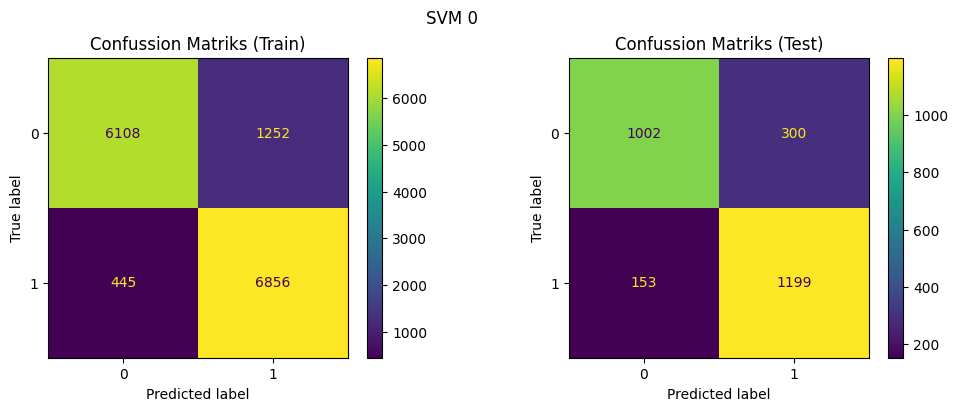

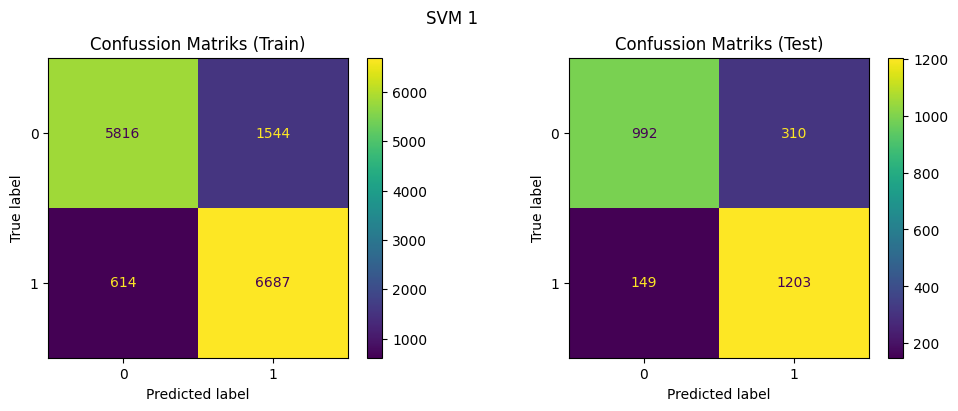

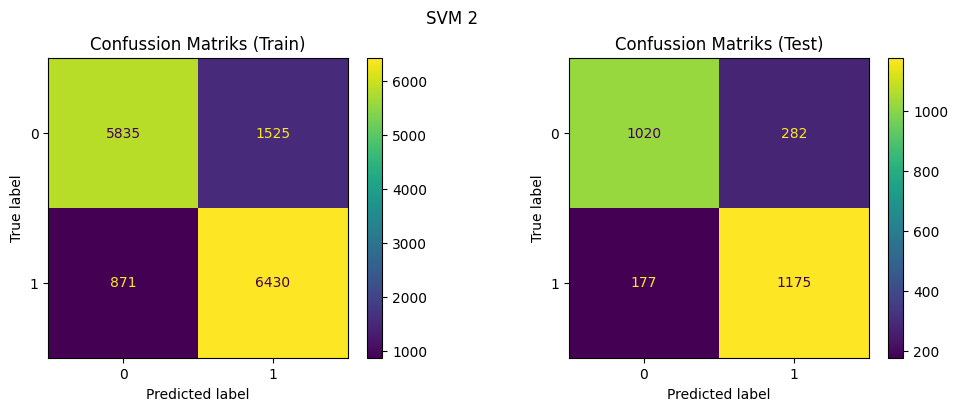

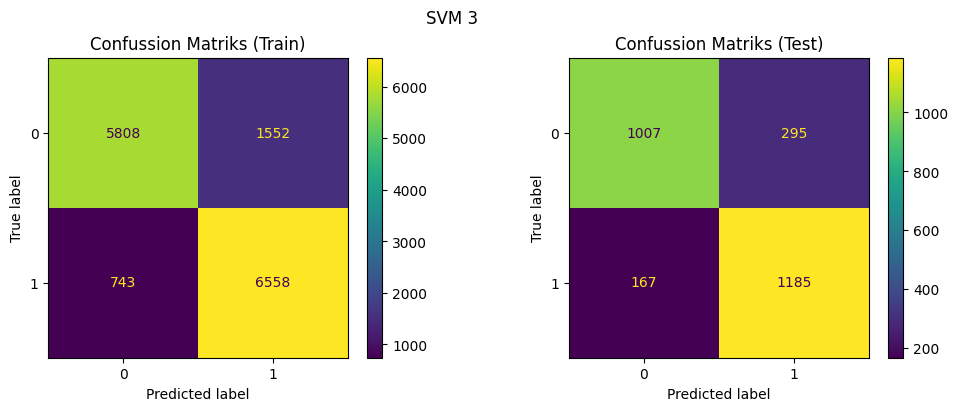

In [33]:
# Pembuatan list model yang akan digunakan 
model_list = [
	SVC(),
	SVC(
		C = 1,
		gamma = 0.1
	),
	SVC(
		gamma = 0.01
	),
	SVC(
		C = 5,
		gamma = 0.01
	)
]

# Pengulangan untuk setiap kombinasi Hyperparameter C
for index, model in enumerate(model_list) :
    
    # Pelatihan model menggunakan data train
    model.fit(X_train_final, y_train)
    
    # Proses prediksi data train dan test
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)
    
    # Pembuatan confusion matriks data train dan test
    confusion_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
    confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
    
    # Pembuaatan subplot yang berisi 2 confusion matriks
    fig = plt.figure(constrained_layout=True, figsize=(10, 4))
    gs = GridSpec(1, 2, figure=fig, hspace=0.1, wspace=0.1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

	# Menampilkan confussion matriks data train
    cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [0, 1])
    cm_display_train.plot(ax=ax1)
    ax1.set_title(f'Confussion Matriks (Train)')
    
	# Menampilkan confussion matriks data test
    cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [0, 1])
    cm_display_test.plot(ax=ax2)
    ax2.set_title(f'Confussion Matriks (Test)')
    
    # Memberikan judul dari subplot
    plt.suptitle(f'SVM {index}')
    plt.show() 

**Insight**:

- Model _baseline_ terlihat memiliki model yang _overfitting_ dikarenakan terdapat perbedaan selisih yang cukup jauh dari nilai akurasi data _train_ dan data _test_. 
- Model akurasi SVM 1 dan SVM 2 memiliki nilai akurasi yang sama pada nilai _test_ namun terlihat bahwa terdapat perbedaan pada nilai _precision_ dan _recall_. Dengan melakukan perbandingan menggunakan matriks lain seperti akurasi, _recall_ dan _f1 score_, terlihat bahwa model SVM 1 memiliki nilai data _train_ yang memiliki selisih yang lebih tinggi dengan data _test_ apabila dibandingkan dengan model SVM 2. Maka dari itu model SVM 2 terlihat lebih general dan tidak memiliki tingkat kompleksitas yang sama dengan model SVM 1. Diasumsikan bahwa dengan mengambil model yang memiliki nilai data _train_ dan _test_ yang saling berdekatan akan menghasilkan data yang lebih relevan pada saat melakukan prediksi data. 
- Model SVM 3 menghasilkan data yang tetap memiliki nilai akurasi data _train_ dan _test_ dengan selisih yang cukup signifikan. Sehingga tidak menghasilkan model yang lebih stabil seperti model SVM 2

### **6. Pemilihan Permodelan**

Pemilihan model yang paling akurat dan terbaik adalah **SVM 2** dengan _hyperparameter_ gamma sebesar 0.01.

In [34]:
# Pemilihan model akhir
final_model = model_list[2]

### **7. Identifikasi Misklasifikasi**

Tahap ini berisi identifikasi terhadap data yang terjadi misklasifikasi, dengan melakukan identifikasi dapat diharapkan mengetahui gambaran data yang mengalami misklasifikasi. 

In [35]:
# Melakukan prediksi data
pred = final_model.predict(X_train_final)

# Pengabungan data dan inputasi prediksi
df_combine = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
df_combine['PREDICT'] = pred

# Filtering data
df_false_predict = df_combine[df_combine['RESULT'] != df_combine['PREDICT']]

#### **A. Data False Negative**

Dataframe dengan kategori _False Negative_ berisi informasi prediksi negatif yang gagal diprediksi. Identifikasi data _False Negative_ sebagai berikut.  

In [36]:
# Memuat dataframe
display(HTML('<center><b><h3>Data False Negative X_train</h3></b></center>'))
df_false_predict[df_false_predict['PREDICT'] == 0]

,MAP,TOURNAMENT,TEAM,SIDE,SCORE,DURATION,HERO_1,HERO_2,HERO_3,HERO_4,HERO_5,RESULT,PREDICT
10031,1,China Dota2 Pro Cup Season 2,Elephant,radiant,21.0,2480,Slark,Templar Assassin,Lion,Bloodseeker,Ogre Magi,1,0
1086,3,MDL DisneylandВ® Paris Major,Team Liquid,dire,16.0,2103,Beastmaster,Razor,Medusa,Earthshaker,Jakiro,1,0
4782,2,ESL One Los Angeles 2020 - Online: Europe & CIS,Nigma Galaxy,dire,22.0,1855,Spirit Breaker,Meepo,Chen,Bristleback,Io,1,0
4543,1,China Dota2 Professional League Season 2,CDEC Gaming,radiant,21.0,2494,Razor,Rubick,Monkey King,Bane,Pangolier,1,0
4389,1,Chinese DOTA2 Professional Association,Ocean,radiant,23.0,1988,Windranger,Slark,Winter Wyvern,Earthshaker,Timbersaw,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,1,Chinese DOTA2 Professional Association,Vici Gaming,radiant,20.0,2265,Tidehunter,Phantom Lancer,Winter Wyvern,Rubick,Void Spirit,1,0
1403,1,DreamLeague Season 11: The Stockholm Major,Chaos Esports Club,radiant,17.0,1380,Spectre,Enigma,Beastmaster,Razor,Oracle,1,0
13360,2,The International 10,Quincy Crew,radiant,19.0,2229,Void Spirit,Medusa,Winter Wyvern,Venomancer,Earthshaker,1,0
16411,2,DPC 2022 Spring Tour - North America Division 1,Evil Geniuses,radiant,20.0,1756,Medusa,Io,Storm Spirit,Timbersaw,Bane,1,0


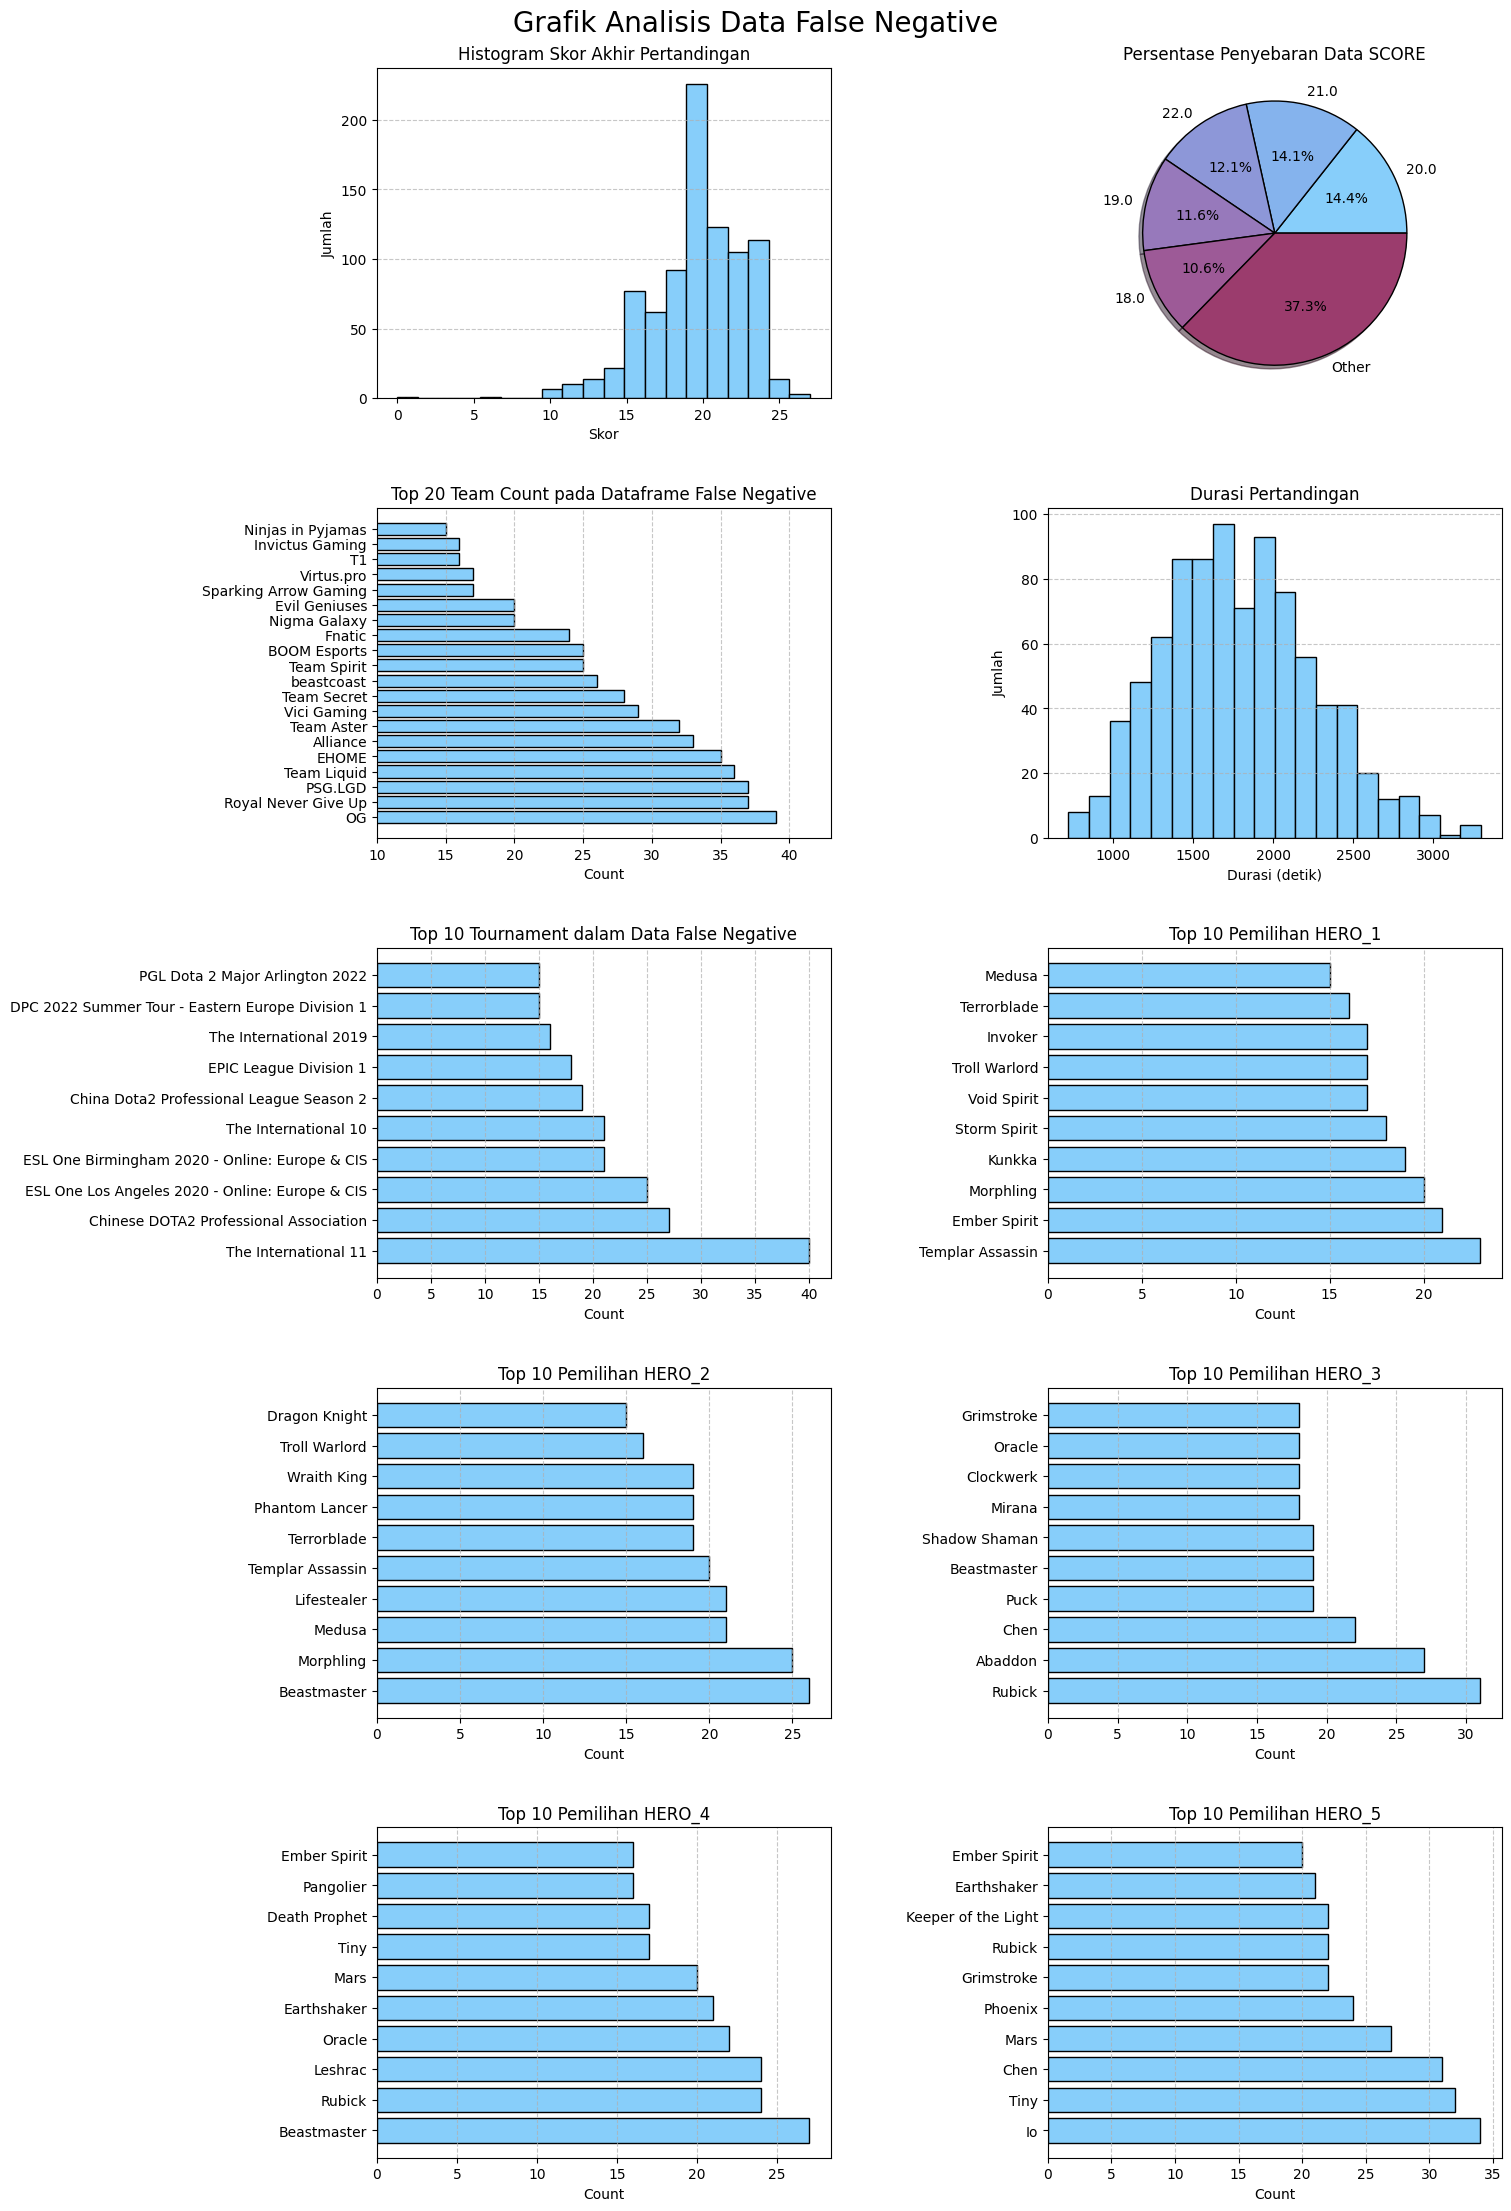

In [37]:
# Memuat dataframe
df_fn = df_false_predict[df_false_predict['PREDICT'] == 0]

fig = plt.figure(constrained_layout=True, figsize=(15, 22))
gs = GridSpec(5, 2, figure=fig, hspace=0.1, wspace=0.1)
threshold = 0.10

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[4, 0])
ax10 = fig.add_subplot(gs[4, 1])

# Grafik kolom 0, 0
ax1.hist(df_fn['SCORE'], bins=20, color='lightskyblue', edgecolor='black')
ax1.set_title('Histogram Skor Akhir Pertandingan')
ax1.set_ylabel('Jumlah')
ax1.set_xlabel('Skor')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

df_fn_graph = df_fn['SCORE'].value_counts()
percentages = df_fn_graph / df_fn_graph.sum()
other = percentages[percentages < threshold].sum()
df_fn_graph_modified = df_fn_graph[percentages >= threshold]
df_fn_graph_modified['Other'] = other * df_fn_graph.sum()
ax2.pie(df_fn_graph_modified, labels=df_fn_graph_modified.index, autopct='%1.1f%%', colors=['lightskyblue', '#85b3ed', '#8d97d8', '#9779bb', '#9d5a97', '#9b3c6d', '#7fd1ae', '#ab99f3', '#9ab0a6'], shadow=True, wedgeprops = {'edgecolor':'black'})
ax2.set_title('Persentase Penyebaran Data SCORE')

df_fn_team = df_fn['TEAM'].value_counts().head(20)
ax3.barh(y=df_fn_team.index, width=df_fn_team.values, color='lightskyblue', edgecolor='black')
ax3.set_title('Top 20 Team Count pada Dataframe False Negative')
ax3.set_xlabel('Count')
ax3.grid(axis='x', linestyle='--', alpha=0.7)
ax3.set_xlim(10, 43)

ax4.hist(df_fn['DURATION'], bins=20, color='lightskyblue', edgecolor='black')
ax4.set_title('Durasi Pertandingan')
ax4.set_ylabel('Jumlah')
ax4.set_xlabel('Durasi (detik)')
ax4.grid(axis='y', linestyle='--', alpha=0.7)

df_fn_tour = df_fn['TOURNAMENT'].value_counts().head(10)
ax5.barh(y=df_fn_tour.index, width=df_fn_tour.values, color='lightskyblue', edgecolor='black')
ax5.set_title('Top 10 Tournament dalam Data False Negative')
ax5.set_xlabel('Count')
ax5.grid(axis='x', linestyle='--', alpha=0.7)

df_fn_HERO_1 = df_fn['HERO_1'].value_counts().head(10)
ax6.barh(y=df_fn_HERO_1.index, width=df_fn_HERO_1.values, color='lightskyblue', edgecolor='black')
ax6.set_title('Top 10 Pemilihan HERO_1')
ax6.set_xlabel('Count')
ax6.grid(axis='x', linestyle='--', alpha=0.7)

df_fn_HERO_2 = df_fn['HERO_2'].value_counts().head(10)
ax7.barh(y=df_fn_HERO_2.index, width=df_fn_HERO_2.values, color='lightskyblue', edgecolor='black')
ax7.set_title('Top 10 Pemilihan HERO_2')
ax7.set_xlabel('Count')
ax7.grid(axis='x', linestyle='--', alpha=0.7)

df_fn_HERO_3 = df_fn['HERO_3'].value_counts().head(10)
ax8.barh(y=df_fn_HERO_3.index, width=df_fn_HERO_3.values, color='lightskyblue', edgecolor='black')
ax8.set_title('Top 10 Pemilihan HERO_3')
ax8.set_xlabel('Count')
ax8.grid(axis='x', linestyle='--', alpha=0.7)

df_fn_HERO_4 = df_fn['HERO_4'].value_counts().head(10)
ax9.barh(y=df_fn_HERO_4.index, width=df_fn_HERO_4.values, color='lightskyblue', edgecolor='black')
ax9.set_title('Top 10 Pemilihan HERO_4')
ax9.set_xlabel('Count')
ax9.grid(axis='x', linestyle='--', alpha=0.7)

df_fn_HERO_5 = df_fn['HERO_5'].value_counts().head(10)
ax10.barh(y=df_fn_HERO_5.index, width=df_fn_HERO_5.values, color='lightskyblue', edgecolor='black')
ax10.set_title('Top 10 Pemilihan HERO_5')
ax10.set_xlabel('Count')
ax10.grid(axis='x', linestyle='--', alpha=0.7)

plt.suptitle('Grafik Analisis Data False Negative', fontsize=20)
plt.show()

**Identifikasi Misklasifikasi False Negative**:

- Data misklasifikasi _False Negative_ terdiri dari 871 data.
- Kecenderungan data misklasifikasi terjadi pada pertandingan dengan skor di antara 15 sampai 25 dan modus skor terjadi pada skor 20 dengan besar 14.4% dari keseluruhan data. Prediksi misklasifikasi dapat dikarenakan model mengambil kesimpulan kekalahan tim pada angka skor yang rendah tanpa melihat situasi pertandingan aktual, hal seperti musuh yang menyerah saat pertandingan dengan skor lawan yang masih rendah tetap membuat tim lawan termasuk dalam hasil menang namun model hanya dapat melihat faktor skor. Maka dari itu terlihat ada skor akhir dengan nilai di bawah 15 pada data histogram yang dapat menjadi misklasifikasi oleh model. 
- Komposisi karakter tidak terlihat adanya faktor-faktor unik dari kolom ini yang menyebabkan model kesulitan dalam memprediksi data dengan akurat. Tidak terlihat adanya pola yang menonjol dari data komposisi karakter, perbedaan jumlah pada setiap karakter dianggap wajar dan setara karena pada modus pada kolom tersebut tidak melebihi 5% dari mayoritas data. 
- Pada data tournament terlihat adanya mayoritas data terdiri dari tournament 'The International 11' yang hampir mencapai 5% dari keseluruhan data. Potensi adanya kesulitan model dalam mempelajari ini dapat dikarenakan pertandingan tournament yang besar seperti 'The International 11' yang merupakan pertandingan kompetitif paling bergengsi dan memiliki _price pool_ tertinggi sehingga membuat pertandingan semakin kompetitif, lebih ketat dalam persaingan dan sulit diprediksi. Maka dari itu terlihat model cenderung kesulitan dalam melakukan prediksi pada tournament-tournament ini. 
- Pada data tim terlihat bahwa data _false negative_ tim tertinggi adalah tim OG. Misklasifikasi prediksi kemenangan dapat dikarenakan skor akhir yang kecil dan pemilihan karakter yang dianggap tidak menguntungkan oleh model, tim OG berhasil dapat memenangkan pertandingan menggunakan banyak strategi berupa pemanfaatan karakter yang tidak terduga atau beresiko untuk dipilih serta menyelesaikan pertandingan cukup dengan skor yang kecil tanpa adanya banyak perlawanan. Namun masih banyak data durasi yang memiliki nilai yang cukup tinggi seperti di atas 40 menit durasi pertandingan yang menunjukkan kasus lain.  

Analisa penulis akan anomali model yang tidak dapat melakukan prediksi akan data _false negative_ adalah situasi pertandingan yang berlangsung secara singkat dan tidak ada perlawanan dari pihak musuh sehingga cukup menghasilkan skor yang minim untuk dapat memenangkan pertandingan dengan durasi yang pendek, hal ini dapat disebut dengan istilah **Snowball Game**. Selain itu, melihat dari data durasi _false negative_ yang cukup tinggi menunjukkan adanya sebagian pertandingan yang juga terselesaikan dengan durasi yang panjang namun sebagian besar berakhir dengan skor minim, ini dapat diakibatkan oleh pertandingan yang dilakukan oleh kedua tim cenderung memiliki tempo lambat dan tidak melakukan banyak peningkatan skor / permainan pasif sehingga kesalahan yang terjadi pada salah satu tim berakhir pada kekalahan mutlak, hal ini dapat disebut dengan istilah **Slow Phase Game**.  

#### **B. Data False Positive**

Dataframe dengan kategori _False Positive_ berisi informasi prediksi positif yang gagal diprediksi. Identifikasi data _False Negative_ sebagai berikut.  

In [38]:
# Memuat dataframe
display(HTML('<center><b><h3>Data False Positive X_train</h3></b></center>'))
df_false_predict[df_false_predict['PREDICT'] == 1]

,MAP,TOURNAMENT,TEAM,SIDE,SCORE,DURATION,HERO_1,HERO_2,HERO_3,HERO_4,HERO_5,RESULT,PREDICT
10230,2,EPIC League Division 1,Vikin.gg,radiant,25.0,3243,Invoker,Slardar,Phoenix,Spectre,Enchantress,0,1
94,2,ESL One Birmingham 2019,Alliance,dire,40.0,3129,Sand King,Juggernaut,Grimstroke,Morphling,Pangolier,0,1
3360,2,The International 11,OG,dire,40.0,3287,Faceless Void,Clockwerk,Jakiro,Viper,Pangolier,0,1
9114,2,OGA Dota PIT Season 3: Europe/CIS,VP.Prodigy,dire,23.0,2909,Storm Spirit,Morphling,Snapfire,Lina,Magnus,0,1
15702,2,ESL One Malaysia 2022,Team Liquid,radiant,29.0,2513,Ursa,Timbersaw,Batrider,Tiny,Dazzle,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,3,Skyesports Championship 4.0,Whoops!,radiant,38.0,3327,Zeus,Mars,Clockwerk,Naga Siren,Mirana,0,1
231,2,StarLadder ImbaTV Dota 2 Minor Season 2,Team Sirius,radiant,25.0,3264,Broodmother,Spectre,Batrider,Tiny,Nature's Prophet,0,1
15498,1,DPC 2022 Winter Tour - North America Finals,Quincy Crew,dire,25.0,2161,Naga Siren,Viper,Dawnbreaker,Ember Spirit,Weaver,0,1
471,2,DOTA Summit 10,compLexity Gaming,dire,25.0,2684,Windranger,Phantom Assassin,Slardar,Earth Spirit,Witch Doctor,0,1


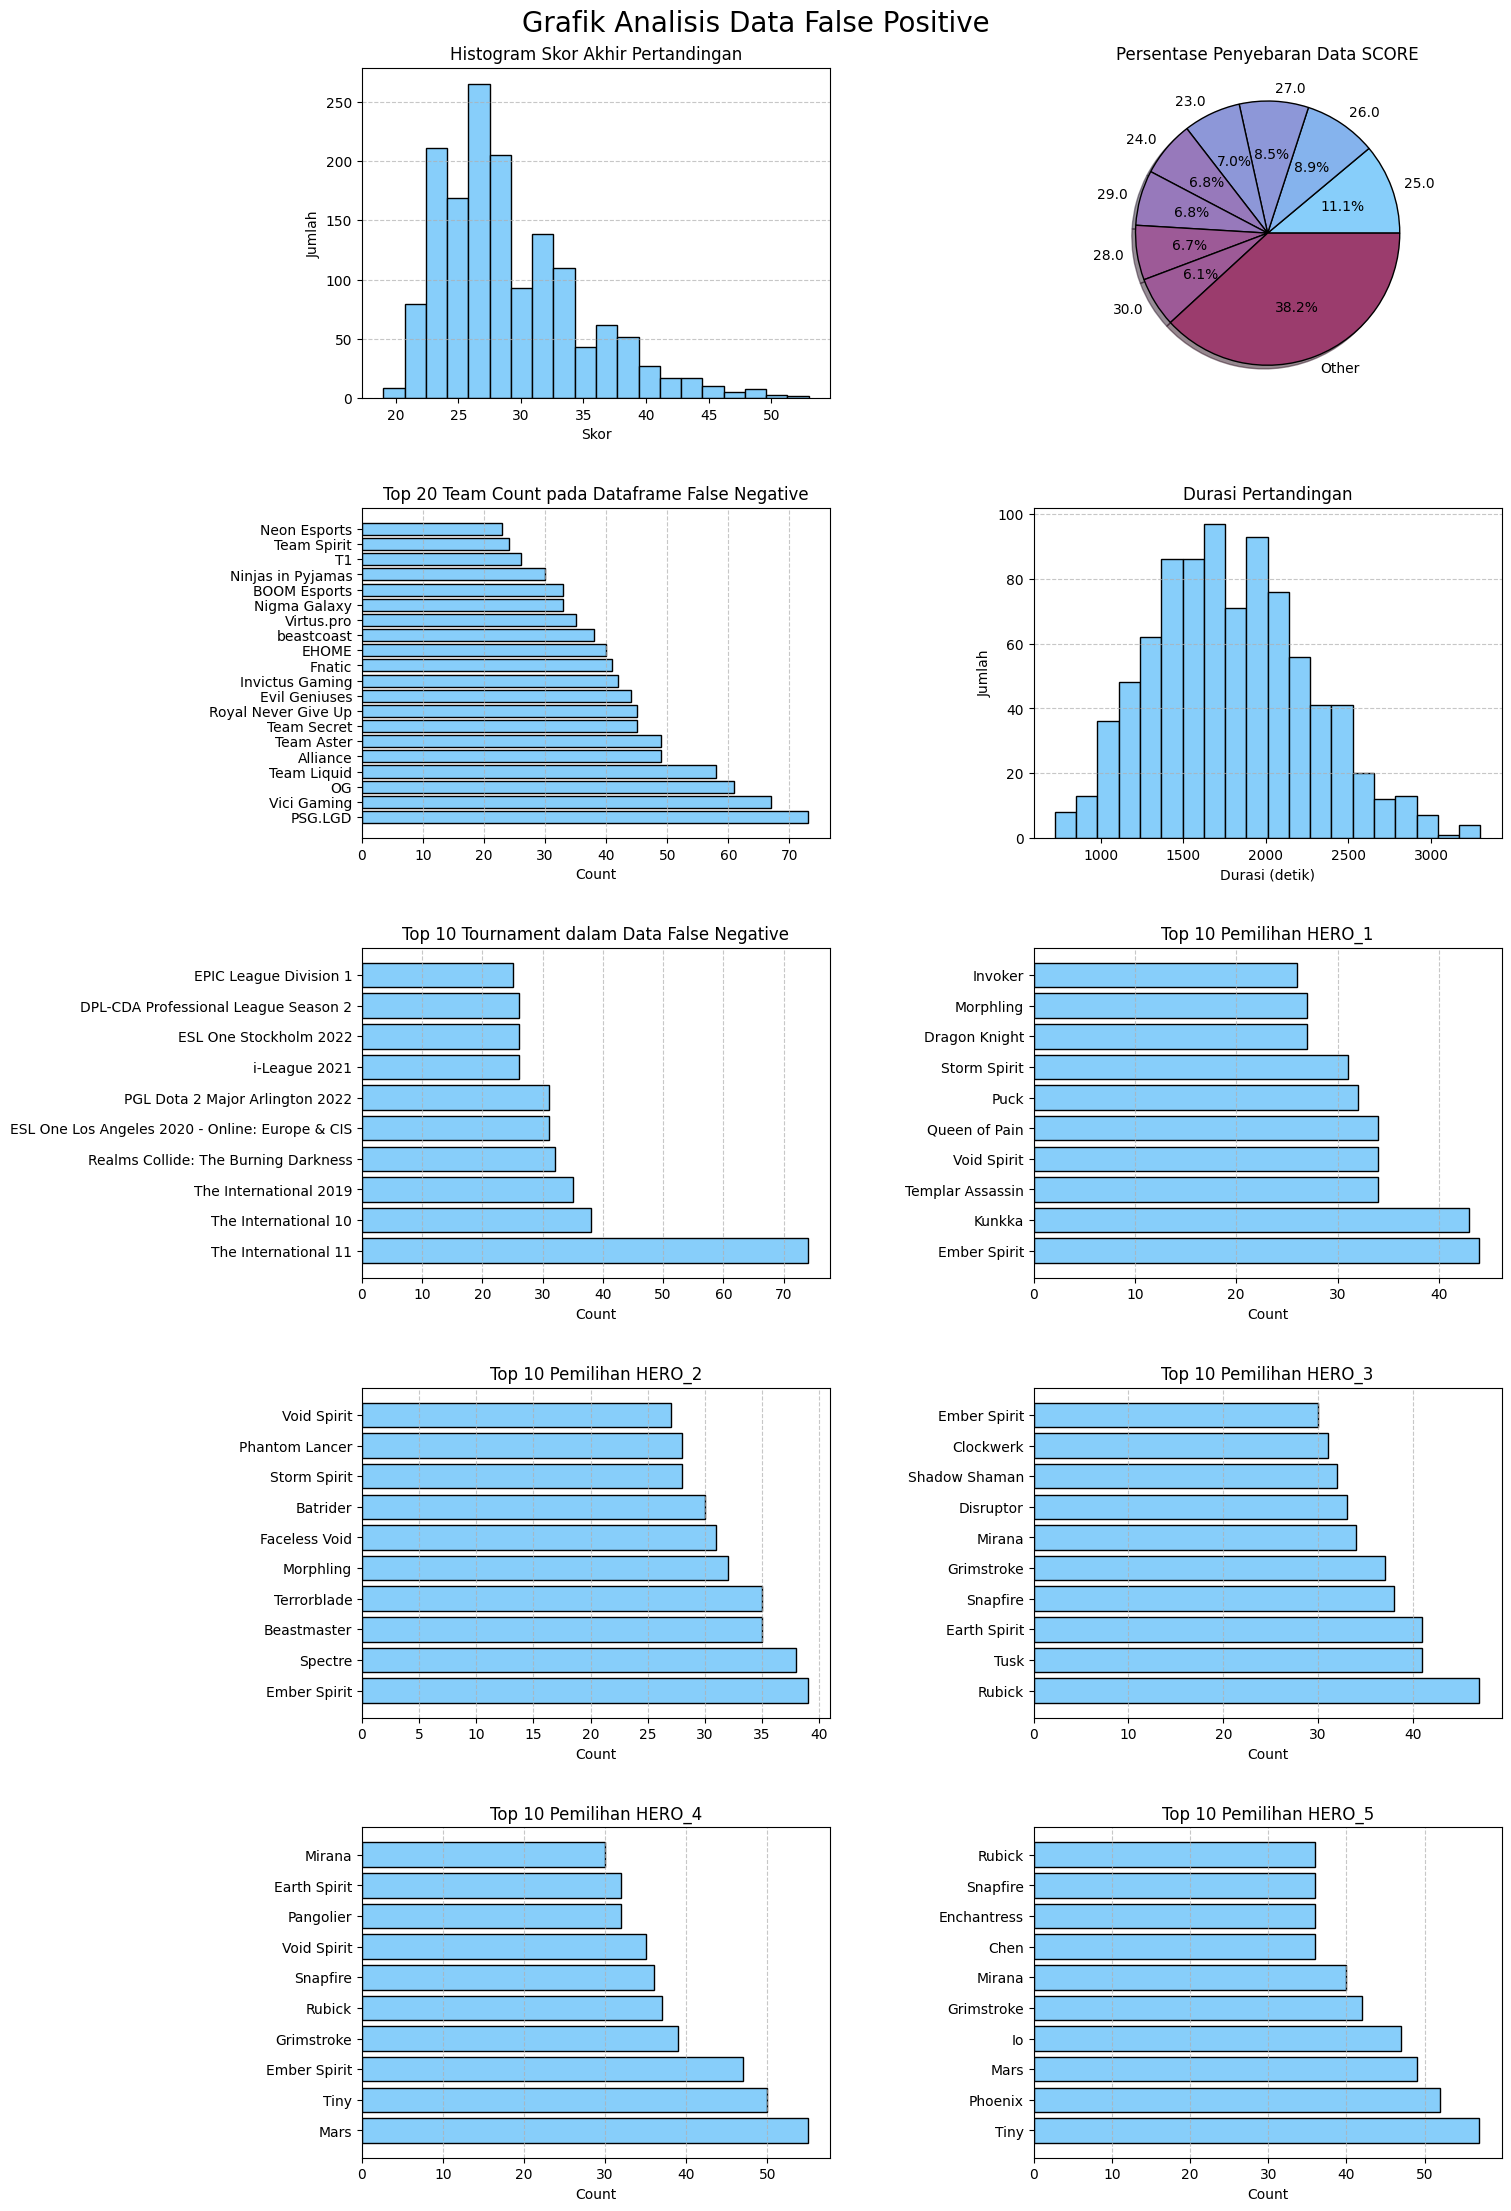

In [39]:
# Memuat dataframe
df_fp = df_false_predict[df_false_predict['PREDICT'] == 1]

fig = plt.figure(constrained_layout=True, figsize=(15, 22))
gs = GridSpec(5, 2, figure=fig, hspace=0.1, wspace=0.1)
threshold = 0.06

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[4, 0])
ax10 = fig.add_subplot(gs[4, 1])

# Grafik kolom 0, 0
ax1.hist(df_fp['SCORE'], bins=20, color='lightskyblue', edgecolor='black')
ax1.set_title('Histogram Skor Akhir Pertandingan')
ax1.set_ylabel('Jumlah')
ax1.set_xlabel('Skor')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

df_fp_graph = df_fp['SCORE'].value_counts()
percentages = df_fp_graph / df_fp_graph.sum()
other = percentages[percentages < threshold].sum()
df_fp_graph_modified = df_fp_graph[percentages >= threshold]
df_fp_graph_modified['Other'] = other * df_fp_graph.sum()
ax2.pie(df_fp_graph_modified, labels=df_fp_graph_modified.index, autopct='%1.1f%%', colors=['lightskyblue', '#85b3ed', '#8d97d8', '#8d97d8', '#9779bb', '#9779bb', '#9d5a97', '#9d5a97', '#9b3c6d'], shadow=True, wedgeprops = {'edgecolor':'black'})
ax2.set_title('Persentase Penyebaran Data SCORE')

df_fp_team = df_fp['TEAM'].value_counts().head(20)
ax3.barh(y=df_fp_team.index, width=df_fp_team.values, color='lightskyblue', edgecolor='black')
ax3.set_title('Top 20 Team Count pada Dataframe False Negative')
ax3.set_xlabel('Count')
ax3.grid(axis='x', linestyle='--', alpha=0.7)

ax4.hist(df_fn['DURATION'], bins=20, color='lightskyblue', edgecolor='black')
ax4.set_title('Durasi Pertandingan')
ax4.set_ylabel('Jumlah')
ax4.set_xlabel('Durasi (detik)')
ax4.grid(axis='y', linestyle='--', alpha=0.7)

df_fp_tour = df_fp['TOURNAMENT'].value_counts().head(10)
ax5.barh(y=df_fp_tour.index, width=df_fp_tour.values, color='lightskyblue', edgecolor='black')
ax5.set_title('Top 10 Tournament dalam Data False Negative')
ax5.set_xlabel('Count')
ax5.grid(axis='x', linestyle='--', alpha=0.7)

df_fp_HERO_1 = df_fp['HERO_1'].value_counts().head(10)
ax6.barh(y=df_fp_HERO_1.index, width=df_fp_HERO_1.values, color='lightskyblue', edgecolor='black')
ax6.set_title('Top 10 Pemilihan HERO_1')
ax6.set_xlabel('Count')
ax6.grid(axis='x', linestyle='--', alpha=0.7)

df_fp_HERO_2 = df_fp['HERO_2'].value_counts().head(10)
ax7.barh(y=df_fp_HERO_2.index, width=df_fp_HERO_2.values, color='lightskyblue', edgecolor='black')
ax7.set_title('Top 10 Pemilihan HERO_2')
ax7.set_xlabel('Count')
ax7.grid(axis='x', linestyle='--', alpha=0.7)

df_fp_HERO_3 = df_fp['HERO_3'].value_counts().head(10)
ax8.barh(y=df_fp_HERO_3.index, width=df_fp_HERO_3.values, color='lightskyblue', edgecolor='black')
ax8.set_title('Top 10 Pemilihan HERO_3')
ax8.set_xlabel('Count')
ax8.grid(axis='x', linestyle='--', alpha=0.7)

df_fp_HERO_4 = df_fp['HERO_4'].value_counts().head(10)
ax9.barh(y=df_fp_HERO_4.index, width=df_fp_HERO_4.values, color='lightskyblue', edgecolor='black')
ax9.set_title('Top 10 Pemilihan HERO_4')
ax9.set_xlabel('Count')
ax9.grid(axis='x', linestyle='--', alpha=0.7)

df_fp_HERO_5 = df_fp['HERO_5'].value_counts().head(10)
ax10.barh(y=df_fp_HERO_5.index, width=df_fp_HERO_5.values, color='lightskyblue', edgecolor='black')
ax10.set_title('Top 10 Pemilihan HERO_5')
ax10.set_xlabel('Count')
ax10.grid(axis='x', linestyle='--', alpha=0.7)

plt.suptitle('Grafik Analisis Data False Positive', fontsize=20)
plt.show()

**Identifikasi Misklasifikasi False Positive**:

- Data misklasifikasi _False Positive_ terdiri dari 1525 data.
- Kecenderungan data misklasifikasi terjadi pada pertandingan dengan skor di antara 23 sampai 30 dan modus skor terjadi pada skor 25 dengan besar 11.1% dari keseluruhan data. Prediksi misklasifikasi terlihat banyak terjadi pada skor dengan variasi tinggi yakni di atas 30, maka dari itu model mengambil kesimpulan bahwa kemenangan suatu tim haruslah terjadi pada saat suatu tim memiliki skor yang tinggi, namun model gagal dalam memprediksi hasil yang tepat. Hal ini dapat dikarenakan adanya situasi seperti keadaan yang berbalik dikarenakan kesalahan suatu tim, maka mengakibatkan kekalahan tim tersebut walaupun memiliki skor yang tinggi. Skor yang tinggi belum menjadi patokan pasti bahwa suatu tim memiliki potensi menang yang mutlak, ada juga potensi bahwa tim lawan memiliki skor yang sama dan permainan menjadi kompetitif / sengit maka penentuan kemenangan kembali kepada kualitas pemain, strategi dan pengalaman pertandingan. 
- Komposisi karakter tidak terlihat adanya faktor-faktor unik dari kolom ini yang menyebabkan model kesulitan dalam memprediksi data dengan akurat. Tidak terlihat adanya pola yang menonjol dari data komposisi karakter, perbedaan jumlah pada setiap karakter dianggap wajar dan setara karena pada modus pada kolom tersebut tidak melebihi 5% dari mayoritas data. 
- Pada data tournament terlihat adanya mayoritas data terdiri dari tournament 'The International 11' yang hampir mencapai 5% dari keseluruhan data dan terdapat tournament sejenis seperti 'The International 10' dan 'The International 2019'. Potensi adanya kesulitan model dalam mempelajari ini dapat dikarenakan pertandingan tournament yang besar seperti 'The International' yang merupakan pertandingan kompetitif paling bergengsi dan memiliki _price pool_ tertinggi sehingga membuat pertandingan semakin kompetitif, lebih ketat dalam persaingan dan sulit diprediksi. Maka dari itu terlihat model cenderung kesulitan dalam melakukan prediksi pada tournament-tournament ini.
- Pada data tim terlihat bahwa data _false positive_ tim tertinggi adalah tim PSG.LGD, Vici Gaming diikuti dengan tim OG. Berdasarkan analisis penulis bahwa tim PSG.LGD dan Vici Gaming merupakan tim liga cina yang mungkin memiliki pola permainan yang berbeda atau _meta_ yang kurang umum dibandingkan dengan tim-tim dari liga lain, sehingga model prediksi lebih sering salah dalam memprediksi performa mereka ketika melihat data pertandingan secara umum.

Analisis penulis akan anomali model yang tidak dapat melakukan prediksi akan data _false positive_ adalah situasi pertandingan yang berlangsung dengan tempo yang tinggi sehingga banyak skor pada data ini banyak memiliki nilai yang tinggi, tanpa melihat durasi dari permainan. Pertandingan pada data _false positive_ seringkali terjadi misklasifikasi dikarenakan model melihat nilai skor yang sudah melewati _decision doundaries_ namun secara data aktual tim mengalami kekalahan. Hal ini dapat dikarenakan kesalahan tim ketika pengambilan keputusan pada saat mengakhiri pertandingan sehingga memberikan kesempatan musuh untuk melakukan serangan balik dan menyelesaikan permainan, hal ini dapat disebut sebagai **Comeback Game**. Maka dari itu skor yang tinggi tidak selalu melambangkan kemenangan dari suatu tim secara mutlak dan masih ada potensi kemenangan balik dari tim lawan ketika tim lawan berhasil memanfaatkan kelemahan pada pengambilan keputusan pada fase akhir pertandingan. Hal lain yang terjadi pada data _false positive_ adalah pertandingan kompetitif yang sering terjadi ketika kedua belah tim sehingga menghasilkan skor yang tinggi namun ini tidak selalu berarti bahwa salah satu tim memiliki keunggulan yang sangat menentukan kemenangan, dalam situasi ini performa masing-masing pemain dan pengambilan keputusan atas hal-hal kecil menjadi penentu dalam kemenangan salah satu tim, hal ini dapat disebut sebagai **Clutch Game**.

## **IX. Model Saving**

Pada tahap ini dilakukan penyimpanan model, scaler serta encoder ke dalam bentuk `pickle`.

In [40]:
# Penyimpanan model final
with open('model.pkl', 'wb') as file:
	pickle.dump(final_model, file)

# Penyimpanan encoding nominal
with open('preprocessor.pkl', 'wb') as file:
	pickle.dump(preprocessor, file)

# Penyimpanan nama karakter
heroes = set(df_org[['HERO_1', 'HERO_2','HERO_3','HERO_4','HERO_5']].stack())
with open('heroes.txt', 'w') as file:
    json.dump(sorted(list(heroes)), file)

# Penyimpanan nama tim
team = set(df_org['TEAM'])
with open('team.txt', 'w') as file:
    json.dump(sorted(list(team)), file)


## **X. Kesimpulan**

Kesimpulan yang dapat diambil dari dokumen ini adalah.

- Skor yang umum terjadi sepanjang _tournament_ adalah 10 sampai 40.
- Durasi umum pertandingan adalah 25 sampai 41 menit. Durasi yang panjang cenderung menandakan pertandingan yang lebih kompetitif antar tim, sebaliknya durasi yang pendek cenderung menandakan dominasi oleh salah satu tim. 
- Tim dengan persentase kemenangan tertinggi adalah tim Outsiders, Team Secret dan PSG.LGD, tidak hanya menunjukkan performa unggul secara umum, tetapi juga dalam pertandingan dengan durasi yang lebih lama, menunjukkan kemampuan adaptasi dan strategi jangka panjang yang kuat. Sementara tim dengan persentase kemenangan terendah adalah tim 5ManMidas, For The Dream dan Creepwave.
- Karakter dengan popularitas tertinggi adalah Tiny, Mars dan Rubick karena kemampuan fleksibilitas dan kekuatannya dalam berbagai situasi permainan. Sementara karakter dengan popularitas paling rendah adalah Tinker, Meepo dan Techies karena penggunaannya yang lebih sulit atau lebih situasional.
- Model yang paling optimal dan akurat dalam memprediksi data adalah model **SVM** dengan _Hyperparameter_ yang paling akurat adalah gamma dengan besar 0.01.
- Akurasi dari model yang terpilih adalah 82.7%, berdasarkan hal ini prediksi yang dijalankan oleh model memiliki tingkat kebenaran terhadap data asli sebesar 82.7% dari keseluruhan data. 
- F1 score dari model yang terpilih adalah 0.8266 dari nilai maksimum 1. Interpretasi dari nilai ini adalah kemampuan model dalam mengkategorikan hasil menang atau kalah serta tingkat kebenaran prediksi yang sudah dikategorikan sebelumnya, nilai F1 score pada model termasuk dalam kategori yang baik. 
- Model memiliki korelasi koefisien yang tinggi pada skor, maka ketika skor melewati batas tertentu untuk setiap data maka dapat diprediksi bahwa tim tersebut menang. Hal ini membuat model kesulitan untuk memprediksi pertandingan yang bersifat kompetitif, berakhir terlalu cepat, dan pertandingan dengan situasi keunggulan berbalik antar tim. 

Saran akan _improvement_.

- Melakukan _hyperparameter tuning_ pada model lain yang tidak memiliki _baseline_ model dengan akurasi terbaik, sehingga dapat melihat potensi kemampuan model lain dalam menghasilkan prediksi yang lebih akurat.
- Kemampuan modeling sangat dipengaruhi oleh indeks SKOR dari tim, maka dari itu perlu banyak informasi lain untuk menunjang data seperti nama pemain, _role_ dan lain-lain sehingga dapat menghasilkan prediksi yang relevan bahkan sebelum pertandingan dimulai. 

Rekomendasi kepada _user_.
- Melakukan perancangan strategi yang berorientasi pada skor, seperti pengambilan tindakan dalam pertandingan yang tidak memiliki risiko tinggi untuk memastikan keunggulan permainan yang lebih stabil dan meminimalisir potensi kemenangan musuh, serta melakukan pelatihan performa individual dan pengambilan keputusan pemain agar dapat meminimalisir terjadinya kekalahan saat unggul dalam segi skor.
- Melakukan perencanaan strategi pada pemilhan karakter pertama dan terakhir dalam penyusunan komposisi karakter, hal ini penting karena pemilihan karakter pertama dapat memberikan fleksibiltas dalam komposisi tim dan karakter terakhir dapat menjadi kunci kemenangan dalam mengeksploitasi kelemahan lawan. 
- Melakukan persiapan dalam pemilihan beberapa karakter yang kurang populer namun memiliki potensi untuk menjadi pilihan karakter akhir pada situasi tertentu.
- Fokus pada karakter-karakter yang memiliki tingkat kemenangan tinggi dari tim-tim yang berpengalaman untuk meningkatkan peluang kemenangan dengan mengadopsi pilihan karakter yang telah terbukti efektif.